Import Statements

In [ ]:
# sklearn utilities
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
!pip install nba_api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Data Preprocessing and Cleaning

In [ ]:
#Import NBA api
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.static import teams
#get all of the team names
teams = teams.get_teams()

#West season data
GSW = [x for x in teams if x['full_name'] == 'Golden State Warriors'][0]
GSW_id = GSW['id']

DAL = [x for x in teams if x['full_name'] == 'Dallas Mavericks'][0]
DAL_id = DAL['id']

LAL = [x for x in teams if x['full_name'] == 'Los Angeles Lakers'][0]
LAL_id = LAL['id']

LAC = [x for x in teams if x['full_name'] == 'Los Angeles Clippers'][0]
LAC_id = LAC['id']

SAC = [x for x in teams if x['full_name'] == 'Sacramento Kings'][0]
SAC_id = SAC['id']

PHX = [x for x in teams if x['full_name'] == 'Phoenix Suns'][0]
PHX_id = PHX['id']

POR = [x for x in teams if x['full_name'] == 'Portland Trail Blazers'][0]
POR_id = POR['id']

DEN = [x for x in teams if x['full_name'] == 'Denver Nuggets'][0]
DEN_id = DEN['id']

HOU = [x for x in teams if x['full_name'] == 'Houston Rockets'][0]
HOU_id = HOU['id']

MEM = [x for x in teams if x['full_name'] == 'Memphis Grizzlies'][0]
MEM_id = MEM['id']

MIN = [x for x in teams if x['full_name'] == 'Minnesota Timberwolves'][0]
MIN_id = MIN['id']

NOP = [x for x in teams if x['full_name'] == 'New Orleans Pelicans'][0]
NOP_id = NOP['id']

OKC = [x for x in teams if x['full_name'] == 'Oklahoma City Thunder'][0]
OKC_id = OKC['id']

SAS = [x for x in teams if x['full_name'] == 'San Antonio Spurs'][0]
SAS_id = SAS['id']

UTA = [x for x in teams if x['full_name'] == 'Utah Jazz'][0]
UTA_id = UTA['id']

#West
GSW_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=GSW_id).get_data_frames()[0]
DAL_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=DAL_id).get_data_frames()[0]
LAL_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=LAL_id).get_data_frames()[0]
LAC_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=LAC_id).get_data_frames()[0]
SAC_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=SAC_id).get_data_frames()[0]
PHX_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=PHX_id).get_data_frames()[0]
POR_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=POR_id).get_data_frames()[0]
DEN_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=DEN_id).get_data_frames()[0]
HOU_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=HOU_id).get_data_frames()[0]
MEM_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=MEM_id).get_data_frames()[0]
MIN_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=MIN_id).get_data_frames()[0]
NOP_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=NOP_id).get_data_frames()[0]
OKC_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=OKC_id).get_data_frames()[0]
SAS_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=SAS_id).get_data_frames()[0]
UTA_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=UTA_id).get_data_frames()[0]


In [ ]:
#Eastern Conference

#East season data
ATL = [x for x in teams if x['full_name'] == 'Atlanta Hawks'][0]
ATL_id = ATL['id']

BKN = [x for x in teams if x['full_name'] == 'Brooklyn Nets'][0]
BKN_id = BKN['id']

BOS = [x for x in teams if x['full_name'] == 'Boston Celtics'][0]
BOS_id = BOS['id']

CHA = [x for x in teams if x['full_name'] == 'Charlotte Hornets'][0]
CHA_id = CHA['id']

CHI = [x for x in teams if x['full_name'] == 'Chicago Bulls'][0]
CHI_id = CHI['id']

CLE = [x for x in teams if x['full_name'] == 'Cleveland Cavaliers'][0]
CLE_id = CLE['id']

DET = [x for x in teams if x['full_name'] == 'Detroit Pistons'][0]
DET_id = DET['id']

IND = [x for x in teams if x['full_name'] == 'Indiana Pacers'][0]
IND_id = IND['id']

MIA = [x for x in teams if x['full_name'] == 'Miami Heat'][0]
MIA_id = MIA['id']

MIL = [x for x in teams if x['full_name'] == 'Milwaukee Bucks'][0]
MIL_id = MIL['id']

NYK = [x for x in teams if x['full_name'] == 'New York Knicks'][0]
NYK_id = NYK['id']

ORL = [x for x in teams if x['full_name'] == 'Orlando Magic'][0]
ORL_id = ORL['id']

PHI = [x for x in teams if x['full_name'] == 'Philadelphia 76ers'][0]
PHI_id = PHI['id']

TOR = [x for x in teams if x['full_name'] == 'Toronto Raptors'][0]
TOR_id = TOR['id']

WAS = [x for x in teams if x['full_name'] == 'Washington Wizards'][0]
WAS_id = WAS['id']

#Eastern Conference
ATL_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=ATL_id).get_data_frames()[0]
BKN_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=BKN_id).get_data_frames()[0]
BOS_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=BOS_id).get_data_frames()[0]
CHA_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=CHA_id).get_data_frames()[0]
CHI_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=CHI_id).get_data_frames()[0]
CLE_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=CLE_id).get_data_frames()[0]
DET_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=DET_id).get_data_frames()[0]
IND_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=IND_id).get_data_frames()[0]
MIA_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=MIA_id).get_data_frames()[0]
MIL_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=MIL_id).get_data_frames()[0]
NYK_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=NYK_id).get_data_frames()[0]
ORL_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=ORL_id).get_data_frames()[0]
PHI_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=PHI_id).get_data_frames()[0]
TOR_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=TOR_id).get_data_frames()[0]
WAS_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=WAS_id).get_data_frames()[0]

In [ ]:
#list of team dfs
dflist = [ATL_games, BKN_games, BOS_games, CHA_games, CHI_games, CLE_games, DET_games, IND_games, MIA_games, MIL_games, NYK_games, ORL_games, PHI_games, TOR_games,
WAS_games, GSW_games, DAL_games, LAL_games, LAC_games, SAC_games, PHX_games, POR_games, DEN_games, HOU_games, MEM_games, MIN_games, NOP_games,
OKC_games, SAS_games, UTA_games]

#concatenate to a full east and west data frame
df_full = pd.concat(dflist)

In [ ]:
df_full.groupby("TEAM_NAME")["GAME_ID"].count()

TEAM_NAME
Atlanta Hawks                        3603
Boston Celtics                       3792
Brooklyn Nets                        1050
Charlotte Bobcats                     901
Charlotte Hornets                    1978
Chicago Bulls                        3675
Cleveland Cavaliers                  3614
Dallas Mavericks                     3648
Denver Nuggets                       3593
Detroit Pistons                      3664
Golden State Warriors                3608
Houston Rockets                      3670
Indiana Pacers                       3622
Kansas City Kings                     167
LA Clippers                           771
Los Angeles Clippers                 2675
Los Angeles Lakers                   3853
Memphis Grizzlies                    2079
Miami Heat                           3300
Milwaukee Bucks                      3607
Minnesota Timberwolves               2968
New Jersey Nets                      2497
New Orleans Hornets                   842
New Orleans Pelicans    

In [ ]:
#select years 2012 to 2022 for training and testing
df_22 = df_full[df_full['GAME_DATE'].str.contains('2022')]
df_21 = df_full[df_full['GAME_DATE'].str.contains('2021')]
df_20 = df_full[df_full['GAME_DATE'].str.contains('2020')]
df_19 = df_full[df_full['GAME_DATE'].str.contains('2019')]
df_18 = df_full[df_full['GAME_DATE'].str.contains('2018')]
df_17 = df_full[df_full['GAME_DATE'].str.contains('2017')]
df_16 = df_full[df_full['GAME_DATE'].str.contains('2016')]
df_15 = df_full[df_full['GAME_DATE'].str.contains('2015')]
df_14 = df_full[df_full['GAME_DATE'].str.contains('2014')]
df_13 = df_full[df_full['GAME_DATE'].str.contains('2013')]
df_12 = df_full[df_full['GAME_DATE'].str.contains('2012')]

df_new_list = df_22, df_21, df_20 , df_19, df_18, df_17, df_16, df_15, df_14, df_13, df_12
df_final = pd.concat(df_new_list)

In [ ]:
#df_final.groupby("TEAM_NAME")["GAME_ID"].count()

In [ ]:
#df_final = df_final[(df_final['GAME_DATE'] > '2012-09-25') & (df_final['GAME_DATE'] < '2022-06-15')]
#df_final.groupby("TEAM_NAME")["GAME_ID"].count()

In [ ]:
#Remove summer league games
#df_final1 = df_final[(df_final['GAME_DATE'] > '2012-09-25') & (df_final['GAME_DATE'] < '2022-06-15')]
#df_final2 = df_final1.drop(df_final1[(df_final1['GAME_DATE'] < '2013-09-25').index & (df_final1['GAME_DATE'] > '2013-06-15')].index)
#df_final3 = df_final2.drop(df_final2[(df_final2['GAME_DATE'] < '2014-09-25') & (df_final2['GAME_DATE'] > '2014-06-15')].index)
#df_final4 = df_final3.drop(df_final3[(df_final3['GAME_DATE'] < '2015-09-25') & (df_final3['GAME_DATE'] > '2015-06-15')].index)
#df_final5 = df_final4.drop(df_final4[(df_final4['GAME_DATE'] < '2016-09-25') & (df_final4['GAME_DATE'] > '2016-06-15')].index)
#df_final6 = df_final5.drop(df_final5[(df_final5['GAME_DATE'] < '2017-09-25') & (df_final5['GAME_DATE'] > '2017-06-15')].index)
#df_final7 = df_final6.drop(df_final6[(df_final6['GAME_DATE'] < '2018-09-25') & (df_final6['GAME_DATE'] > '2018-06-15')].index)
#df_final8 = df_final7.drop(df_final7[(df_final7['GAME_DATE'] < '2019-09-25') & (df_final7['GAME_DATE'] > '2019-06-15')].index)
#df_final9 = df_final8.drop(df_final8[(df_final8['GAME_DATE'] < '2020-09-25') & (df_final8['GAME_DATE'] > '2020-06-15')].index)
#df_final10 = df_final9.drop(df_final9[(df_final9['GAME_DATE'] < '2021-09-25') & (df_final9['GAME_DATE'] > '2021-06-15')].index)

#View our final df of team data for seasons 2012-13 to 2021-22
#df_final10.head()

In [ ]:
#Remove summer league games
df_final1 = df_final[(df_final['GAME_DATE'] > '2012-10-30') & (df_final['GAME_DATE'] < '2022-04-17')]
df_final2 = df_final1[(df_final1['GAME_DATE'] > '2013-10-28') | (df_final1['GAME_DATE'] < '2013-04-18')]
df_final3 = df_final2[(df_final2['GAME_DATE'] > '2014-10-27') | (df_final2['GAME_DATE'] < '2014-04-17')]
df_final4 = df_final3[(df_final3['GAME_DATE'] > '2015-10-26') | (df_final3['GAME_DATE'] < '2015-04-16')]
df_final5 = df_final4[(df_final4['GAME_DATE'] > '2016-10-24') | (df_final4['GAME_DATE'] < '2016-04-14')]
df_final6 = df_final5[(df_final5['GAME_DATE'] > '2017-10-16') | (df_final5['GAME_DATE'] < '2017-04-13')]
df_final7 = df_final6[(df_final6['GAME_DATE'] > '2018-10-15') | (df_final6['GAME_DATE'] < '2018-04-12')]
df_final8 = df_final7[(df_final7['GAME_DATE'] > '2019-10-21') | (df_final7['GAME_DATE'] < '2019-04-11')]
df_final9 = df_final8[(df_final8['GAME_DATE'] > '2020-12-21') | (df_final8['GAME_DATE'] < '2020-10-11')]
df_final10 = df_final9[(df_final9['GAME_DATE'] > '2021-10-18') | (df_final9['GAME_DATE'] < '2021-05-17')]

#View our final df of team data for seasons 2012-13 to 2021-22
df_final10

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
104,52021,1610612737,ATL,Atlanta Hawks,0052100201,2022-04-15,ATL @ CLE,W,239,107,...,0.909,10.0,32.0,42.0,15,5.0,3,13,19,6.0
105,52021,1610612737,ATL,Atlanta Hawks,0052100111,2022-04-13,ATL vs. CHA,W,240,132,...,0.720,12.0,42.0,54.0,31,5.0,6,10,25,29.0
106,22021,1610612737,ATL,Atlanta Hawks,0022101221,2022-04-10,ATL @ HOU,W,240,130,...,0.792,13.0,37.0,50.0,29,4.0,4,12,19,16.0
107,22021,1610612737,ATL,Atlanta Hawks,0022101207,2022-04-08,ATL @ MIA,L,240,109,...,0.895,13.0,30.0,43.0,17,9.0,0,14,23,-4.0
108,22021,1610612737,ATL,Atlanta Hawks,0022101192,2022-04-06,ATL vs. WAS,W,242,118,...,0.842,7.0,32.0,39.0,26,11.0,1,6,13,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,22012,1610612762,UTA,Utah Jazz,0021200062,2012-11-07,UTA vs. LAL,W,239,95,...,0.889,9.0,28.0,37.0,21,12.0,7,12,30,9.0
1052,22012,1610612762,UTA,Utah Jazz,0021200045,2012-11-05,UTA @ MEM,L,241,94,...,0.692,11.0,31.0,42.0,20,8.0,8,14,22,-9.0
1053,22012,1610612762,UTA,Utah Jazz,0021200035,2012-11-03,UTA @ SAS,L,240,100,...,0.864,9.0,23.0,32.0,17,11.0,7,16,22,-10.0
1054,22012,1610612762,UTA,Utah Jazz,0021200021,2012-11-02,UTA @ NOH,L,240,86,...,0.500,16.0,28.0,44.0,19,7.0,6,14,21,-2.0


In [ ]:
df_final10.groupby("TEAM_NAME")["GAME_ID"].count()

TEAM_NAME
Atlanta Hawks             797
Boston Celtics            818
Brooklyn Nets             808
Charlotte Bobcats         164
Charlotte Hornets         630
Chicago Bulls             793
Cleveland Cavaliers       794
Dallas Mavericks          812
Denver Nuggets            824
Detroit Pistons           794
Golden State Warriors     794
Houston Rockets           815
Indiana Pacers            807
LA Clippers               572
Los Angeles Clippers      246
Los Angeles Lakers        821
Memphis Grizzlies         806
Miami Heat                823
Milwaukee Bucks           814
Minnesota Timberwolves    794
New Orleans Hornets        82
New Orleans Pelicans      723
New York Knicks           794
Oklahoma City Thunder     810
Orlando Magic             809
Philadelphia 76ers        809
Phoenix Suns              804
Portland Trail Blazers    811
Sacramento Kings          803
San Antonio Spurs         803
Toronto Raptors           815
Utah Jazz                 811
Washington Wizards        802


In [ ]:
df_final_names = df_final10.loc[:, ('TEAM_NAME', 'TEAM_ID')]


In [ ]:
dfnewteams = df_final_names.drop_duplicates(subset=['TEAM_NAME'])
dfnewteams.sort_values(by='TEAM_ID')

,TEAM_NAME,TEAM_ID
104,Atlanta Hawks,1610612737
126,Boston Celtics,1610612738
96,Cleveland Cavaliers,1610612739
99,New Orleans Pelicans,1610612740
927,New Orleans Hornets,1610612740
98,Chicago Bulls,1610612741
107,Dallas Mavericks,1610612742
107,Denver Nuggets,1610612743
128,Golden State Warriors,1610612744
91,Houston Rockets,1610612745


**Feature** **Engineering**

Offensive and Defensive Rating

In [ ]:
# create possessions column
possessions = []
poss = 0
Y = 0.4
for index, row in df_final.iterrows():
  FGA = row["FGA"]
  OR = row["OREB"]
  TO = row["TOV"]
  FTA = row["FTA"]
  poss = (FGA - OR) + TO + (Y*FTA)
  possessions.append(poss)

df_final["POSS"] = possessions


In [ ]:
# create points against column

PTS_AGAINST = []
PA = 0
for index, row in df_final.iterrows():
  PTS = row["PTS"]
  PM = row["PLUS_MINUS"]
  PA = PTS - PM
  PTS_AGAINST.append(PA)

df_final["PTS_AGAINST"] = PTS_AGAINST

In [ ]:
# Offensive rating column

OFF_RTG = []
OFRT = 0
for index, row in df_final.iterrows():
  PTS = row["PTS"]
  POSS = row["POSS"]
  OFRT = (PTS/POSS)*100
  OFF_RTG.append(OFRT)

df_final["OFF_RTG"] = OFF_RTG

In [ ]:
# Defensive rating column

DEF_RTG = []
DEFRT = 0
for index, row in df_final.iterrows():
  PTS_AGAINST = row["PTS_AGAINST"]
  POSS = row["POSS"]
  DEFRT = (PTS_AGAINST/POSS)*100
  DEF_RTG.append(DEFRT)

df_final["DEF_RTG"] = DEF_RTG

df_final


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,AST,STL,BLK,TOV,PF,PLUS_MINUS,POSS,PTS_AGAINST,OFF_RTG,DEF_RTG
104,52021,1610612737,ATL,Atlanta Hawks,0052100201,2022-04-15,ATL @ CLE,W,239,107,...,15,5.0,3,13,19,6.0,91.8,101.0,116.557734,110.021786
105,52021,1610612737,ATL,Atlanta Hawks,0052100111,2022-04-13,ATL vs. CHA,W,240,132,...,31,5.0,6,10,25,29.0,102.0,103.0,129.411765,100.980392
106,22021,1610612737,ATL,Atlanta Hawks,0022101221,2022-04-10,ATL @ HOU,W,240,130,...,29,4.0,4,12,19,16.0,95.6,114.0,135.983264,119.246862
107,22021,1610612737,ATL,Atlanta Hawks,0022101207,2022-04-08,ATL @ MIA,L,240,109,...,17,9.0,0,14,23,-4.0,96.6,113.0,112.836439,116.977226
108,22021,1610612737,ATL,Atlanta Hawks,0022101192,2022-04-06,ATL vs. WAS,W,242,118,...,26,11.0,1,6,13,15.0,98.6,103.0,119.675456,104.462475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,22012,1610612762,UTA,Utah Jazz,0021200062,2012-11-07,UTA vs. LAL,W,239,95,...,21,12.0,7,12,30,9.0,93.2,86.0,101.931330,92.274678
1052,22012,1610612762,UTA,Utah Jazz,0021200045,2012-11-05,UTA @ MEM,L,241,94,...,20,8.0,8,14,22,-9.0,98.2,103.0,95.723014,104.887984
1053,22012,1610612762,UTA,Utah Jazz,0021200035,2012-11-03,UTA @ SAS,L,240,100,...,17,11.0,7,16,22,-10.0,92.8,110.0,107.758621,118.534483
1054,22012,1610612762,UTA,Utah Jazz,0021200021,2012-11-02,UTA @ NOH,L,240,86,...,19,7.0,6,14,21,-2.0,87.8,88.0,97.949886,100.227790


**ELO Score**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving nba_elo.csv to nba_elo.csv


In [ ]:
import io

# read in elo dataset form 538
elo_df = pd.read_csv(io.BytesIO(uploaded['nba_elo.csv']))
# Dataset is now stored in a Pandas Dataframe


In [ ]:
# new var in proper date/time format
elo_df["GAME_DATE"] =  pd.to_datetime(elo_df['date'])

In [ ]:
# keep only games between 2012 and 2022, no summer games
elo_df = elo_df[(elo_df['GAME_DATE'] > '2012-10-30') & (elo_df['GAME_DATE'] < '2022-04-17')]
elo_df = elo_df[(elo_df['GAME_DATE'] > '2013-10-28') | (elo_df['GAME_DATE'] < '2013-04-18')]
elo_df = elo_df[(elo_df['GAME_DATE'] > '2014-10-27') | (elo_df['GAME_DATE'] < '2014-04-17')]
elo_df = elo_df[(elo_df['GAME_DATE'] > '2015-10-26') | (elo_df['GAME_DATE'] < '2015-04-16')]
elo_df = elo_df[(elo_df['GAME_DATE'] > '2016-10-24') | (elo_df['GAME_DATE'] < '2016-04-14')]
elo_df = elo_df[(elo_df['GAME_DATE'] > '2017-10-16') | (elo_df['GAME_DATE'] < '2017-04-13')]
elo_df = elo_df[(elo_df['GAME_DATE'] > '2018-10-15') | (elo_df['GAME_DATE'] < '2018-04-12')]
elo_df = elo_df[(elo_df['GAME_DATE'] > '2019-10-21') | (elo_df['GAME_DATE'] < '2019-04-11')]
elo_df = elo_df[(elo_df['GAME_DATE'] > '2020-12-21') | (elo_df['GAME_DATE'] < '2020-10-11')]
elo_df = elo_df[(elo_df['GAME_DATE'] > '2021-10-18') | (elo_df['GAME_DATE'] < '2021-05-17')]

In [ ]:
elo_df

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2,quality,importance,total_rating,GAME_DATE
59216,10/31/2012,2013,0,NaN,PHO,GSW,1530.181200,1421.180700,0.769076,0.230924,...,NaN,NaN,NaN,NaN,85.0,87.0,34,NaN,NaN,2012-10-31
59217,10/31/2012,2013,0,NaN,POR,LAL,1450.661400,1541.758500,0.512809,0.487191,...,NaN,NaN,NaN,NaN,116.0,106.0,44,NaN,NaN,2012-10-31
59218,10/31/2012,2013,0,NaN,PHI,DEN,1537.505900,1576.395300,0.587049,0.412951,...,NaN,NaN,NaN,NaN,84.0,75.0,72,NaN,NaN,2012-10-31
59219,10/31/2012,2013,0,NaN,NOP,SAS,1453.047500,1676.213600,0.329820,0.670180,...,NaN,NaN,NaN,NaN,95.0,99.0,72,NaN,NaN,2012-10-31
59220,10/31/2012,2013,0,NaN,DET,HOU,1430.975800,1501.255600,0.542667,0.457333,...,NaN,NaN,NaN,NaN,96.0,105.0,30,NaN,NaN,2012-10-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71955,4/15/2022,2022,0,p,LAC,NOP,1533.577886,1521.927966,0.655365,0.344635,...,1529.112528,1524.379918,0.640060,0.359940,101.0,105.0,62,100.0,81.0,2022-04-15
71956,4/16/2022,2022,0,q,DAL,UTA,1598.770266,1589.147694,0.652725,0.347275,...,1532.683424,1654.169809,0.477731,0.522269,93.0,99.0,83,100.0,92.0,2022-04-16
71957,4/16/2022,2022,0,q,MEM,MIN,1637.797872,1566.116618,0.728747,0.271253,...,1573.079786,1588.351996,0.617758,0.382242,117.0,130.0,80,100.0,90.0,2022-04-16
71958,4/16/2022,2022,0,q,PHI,TOR,1603.006549,1601.489103,0.642075,0.357925,...,1674.386536,1588.885390,0.736309,0.263691,131.0,111.0,91,100.0,96.0,2022-04-16


In [ ]:
# duplicate every row

elo_df1 = pd.DataFrame(np.repeat(elo_df.values, 2, axis = 0))
elo_df1.columns = elo_df.columns

elo_df1['ID'] = range(1, len(elo_df1)+1)
elo_df1


,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2,quality,importance,total_rating,GAME_DATE,ID
0,10/31/2012,2013,0,NaN,PHO,GSW,1530.1812,1421.1807,0.769076,0.230924,...,NaN,NaN,NaN,85.0,87.0,34,NaN,NaN,2012-10-31,1
1,10/31/2012,2013,0,NaN,PHO,GSW,1530.1812,1421.1807,0.769076,0.230924,...,NaN,NaN,NaN,85.0,87.0,34,NaN,NaN,2012-10-31,2
2,10/31/2012,2013,0,NaN,POR,LAL,1450.6614,1541.7585,0.512809,0.487191,...,NaN,NaN,NaN,116.0,106.0,44,NaN,NaN,2012-10-31,3
3,10/31/2012,2013,0,NaN,POR,LAL,1450.6614,1541.7585,0.512809,0.487191,...,NaN,NaN,NaN,116.0,106.0,44,NaN,NaN,2012-10-31,4
4,10/31/2012,2013,0,NaN,PHI,DEN,1537.5059,1576.3953,0.587049,0.412951,...,NaN,NaN,NaN,84.0,75.0,72,NaN,NaN,2012-10-31,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24131,4/16/2022,2022,0,q,MEM,MIN,1637.797872,1566.116618,0.728747,0.271253,...,1588.351996,0.617758,0.382242,117.0,130.0,80,100.0,90.0,2022-04-16,24132
24132,4/16/2022,2022,0,q,PHI,TOR,1603.006549,1601.489103,0.642075,0.357925,...,1588.88539,0.736309,0.263691,131.0,111.0,91,100.0,96.0,2022-04-16,24133
24133,4/16/2022,2022,0,q,PHI,TOR,1603.006549,1601.489103,0.642075,0.357925,...,1588.88539,0.736309,0.263691,131.0,111.0,91,100.0,96.0,2022-04-16,24134
24134,4/16/2022,2022,0,q,GSW,DEN,1610.056299,1549.251713,0.716195,0.283805,...,1575.712524,0.726859,0.273141,123.0,107.0,89,100.0,95.0,2022-04-16,24135


In [ ]:
# create df of team and their pre elo
# keep game date, team, pre elo

elo_df2 = pd.DataFrame()
elo_df2["GAME_DATE"] = elo_df1["GAME_DATE"]

elo_df2["TEAM_NAME"] = np.where(elo_df1["ID"] % 2 != 0, elo_df1["team1"], elo_df1["team2"])
elo_df2

elo_df2["PRE_ELO"] = np.where(elo_df1["ID"] % 2 != 0, elo_df1["elo1_pre"], elo_df1["elo2_pre"])
elo_df2["TEAM_ABBREVIATION"] = elo_df2["TEAM_NAME"]
elo_df2



,GAME_DATE,TEAM_NAME,PRE_ELO,TEAM_ABBREVIATION
0,2012-10-31,PHO,1530.1812,PHO
1,2012-10-31,GSW,1421.1807,GSW
2,2012-10-31,POR,1450.6614,POR
3,2012-10-31,LAL,1541.7585,LAL
4,2012-10-31,PHI,1537.5059,PHI
...,...,...,...,...
24131,2022-04-16,MIN,1566.116618,MIN
24132,2022-04-16,PHI,1603.006549,PHI
24133,2022-04-16,TOR,1601.489103,TOR
24134,2022-04-16,GSW,1610.056299,GSW


In [ ]:
print(sorted(df_final["TEAM_ABBREVIATION"].unique()))

['ATL', 'BKN', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOH', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS']


In [ ]:
print(sorted(elo_df2["TEAM_ABBREVIATION"].unique()))

['ATL', 'BOS', 'BRK', 'CHI', 'CHO', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS']


In [ ]:
# make sure the team abbreviations are matching

elo_df2['TEAM_ABBREVIATION'] = elo_df2['TEAM_ABBREVIATION'].replace('BRK', 'BKN')
elo_df2['TEAM_ABBREVIATION'] = elo_df2['TEAM_ABBREVIATION'].replace('CHO', 'CHA')
elo_df2['TEAM_ABBREVIATION'] = elo_df2['TEAM_ABBREVIATION'].replace('PHO', 'PHX')
elo_df2['TEAM_ABBREVIATION'] = elo_df2['TEAM_ABBREVIATION'].replace('CHO', 'CHA')

print(sorted(elo_df2["TEAM_ABBREVIATION"].unique()))


['ATL', 'BKN', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS']


In [ ]:
# change new orleans hornets (changed to the pelicans after 2012-2013) from NOH to NOP for consistency
df_final['TEAM_ABBREVIATION'] = df_final['TEAM_ABBREVIATION'].replace('NOH', 'NOP')

print(sorted(df_final["TEAM_ABBREVIATION"].unique()))

['ATL', 'BKN', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS']


In [ ]:
# elo_df2 = elo_df2.drop("TEAM_NAME", axis = 1)
elo_df2

,GAME_DATE,TEAM_NAME,PRE_ELO,TEAM_ABBREVIATION
0,2012-10-31,PHO,1530.1812,PHX
1,2012-10-31,GSW,1421.1807,GSW
2,2012-10-31,POR,1450.6614,POR
3,2012-10-31,LAL,1541.7585,LAL
4,2012-10-31,PHI,1537.5059,PHI
...,...,...,...,...
24131,2022-04-16,MIN,1566.116618,MIN
24132,2022-04-16,PHI,1603.006549,PHI
24133,2022-04-16,TOR,1601.489103,TOR
24134,2022-04-16,GSW,1610.056299,GSW


In [ ]:
df_final["GAME_DATE"] =  pd.to_datetime(df_final['GAME_DATE'])

In [ ]:
# merge elo score column based on team and date

df_final_elo = pd.merge(df_final, elo_df2[['TEAM_ABBREVIATION', 'GAME_DATE', 'PRE_ELO']], on=['TEAM_ABBREVIATION', 'GAME_DATE'])
df_final_elo

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,STL,BLK,TOV,PF,PLUS_MINUS,POSS,PTS_AGAINST,OFF_RTG,DEF_RTG,PRE_ELO
0,52021,1610612737,ATL,Atlanta Hawks,0052100201,2022-04-15,ATL @ CLE,W,239,107,...,5.0,3,13,19,6.0,91.8,101.0,116.557734,110.021786,1577.169522
1,52021,1610612737,ATL,Atlanta Hawks,0052100111,2022-04-13,ATL vs. CHA,W,240,132,...,5.0,6,10,25,29.0,102.0,103.0,129.411765,100.980392,1563.918805
2,22021,1610612737,ATL,Atlanta Hawks,0022101221,2022-04-10,ATL @ HOU,W,240,130,...,4.0,4,12,19,16.0,95.6,114.0,135.983264,119.246862,1556.439486
3,22021,1610612737,ATL,Atlanta Hawks,0022101207,2022-04-08,ATL @ MIA,L,240,109,...,9.0,0,14,23,-4.0,96.6,113.0,112.836439,116.977226,1559.652311
4,22021,1610612737,ATL,Atlanta Hawks,0022101192,2022-04-06,ATL vs. WAS,W,242,118,...,11.0,1,6,13,15.0,98.6,103.0,119.675456,104.462475,1554.190188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24131,22012,1610612762,UTA,Utah Jazz,0021200062,2012-11-07,UTA vs. LAL,W,239,95,...,12.0,7,12,30,9.0,93.2,86.0,101.931330,92.274678,1529.535
24132,22012,1610612762,UTA,Utah Jazz,0021200045,2012-11-05,UTA @ MEM,L,241,94,...,8.0,8,14,22,-9.0,98.2,103.0,95.723014,104.887984,1534.7893
24133,22012,1610612762,UTA,Utah Jazz,0021200035,2012-11-03,UTA @ SAS,L,240,100,...,11.0,7,16,22,-10.0,92.8,110.0,107.758621,118.534483,1538.1984
24134,22012,1610612762,UTA,Utah Jazz,0021200021,2012-11-02,UTA @ NOH,L,240,86,...,7.0,6,14,21,-2.0,87.8,88.0,97.949886,100.227790,1542.9183


In [ ]:
df_avg10 = df_final_elo.drop('PRE_ELO', axis = 1)
df_avg10

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,AST,STL,BLK,TOV,PF,PLUS_MINUS,POSS,PTS_AGAINST,OFF_RTG,DEF_RTG
0,52021,1610612737,ATL,Atlanta Hawks,0052100201,2022-04-15,ATL @ CLE,W,239,107,...,15,5.0,3,13,19,6.0,91.8,101.0,116.557734,110.021786
1,52021,1610612737,ATL,Atlanta Hawks,0052100111,2022-04-13,ATL vs. CHA,W,240,132,...,31,5.0,6,10,25,29.0,102.0,103.0,129.411765,100.980392
2,22021,1610612737,ATL,Atlanta Hawks,0022101221,2022-04-10,ATL @ HOU,W,240,130,...,29,4.0,4,12,19,16.0,95.6,114.0,135.983264,119.246862
3,22021,1610612737,ATL,Atlanta Hawks,0022101207,2022-04-08,ATL @ MIA,L,240,109,...,17,9.0,0,14,23,-4.0,96.6,113.0,112.836439,116.977226
4,22021,1610612737,ATL,Atlanta Hawks,0022101192,2022-04-06,ATL vs. WAS,W,242,118,...,26,11.0,1,6,13,15.0,98.6,103.0,119.675456,104.462475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24131,22012,1610612762,UTA,Utah Jazz,0021200062,2012-11-07,UTA vs. LAL,W,239,95,...,21,12.0,7,12,30,9.0,93.2,86.0,101.931330,92.274678
24132,22012,1610612762,UTA,Utah Jazz,0021200045,2012-11-05,UTA @ MEM,L,241,94,...,20,8.0,8,14,22,-9.0,98.2,103.0,95.723014,104.887984
24133,22012,1610612762,UTA,Utah Jazz,0021200035,2012-11-03,UTA @ SAS,L,240,100,...,17,11.0,7,16,22,-10.0,92.8,110.0,107.758621,118.534483
24134,22012,1610612762,UTA,Utah Jazz,0021200021,2012-11-02,UTA @ NOH,L,240,86,...,19,7.0,6,14,21,-2.0,87.8,88.0,97.949886,100.227790


In [ ]:
print(df_final["TEAM_ABBREVIATION"].unique())
df_final_elo

['ATL' 'BKN' 'BOS' 'CHA' 'CHI' 'CLE' 'DET' 'IND' 'MIA' 'MIL' 'NYK' 'ORL'
 'PHI' 'TOR' 'WAS' 'GSW' 'DAL' 'LAL' 'LAC' 'SAC' 'PHX' 'POR' 'DEN' 'HOU'
 'MEM' 'MIN' 'NOP' 'OKC' 'SAS' 'UTA']


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,STL,BLK,TOV,PF,PLUS_MINUS,POSS,PTS_AGAINST,OFF_RTG,DEF_RTG,PRE_ELO
0,52021,1610612737,ATL,Atlanta Hawks,0052100201,2022-04-15,ATL @ CLE,W,239,107,...,5.0,3,13,19,6.0,91.8,101.0,116.557734,110.021786,1577.169522
1,52021,1610612737,ATL,Atlanta Hawks,0052100111,2022-04-13,ATL vs. CHA,W,240,132,...,5.0,6,10,25,29.0,102.0,103.0,129.411765,100.980392,1563.918805
2,22021,1610612737,ATL,Atlanta Hawks,0022101221,2022-04-10,ATL @ HOU,W,240,130,...,4.0,4,12,19,16.0,95.6,114.0,135.983264,119.246862,1556.439486
3,22021,1610612737,ATL,Atlanta Hawks,0022101207,2022-04-08,ATL @ MIA,L,240,109,...,9.0,0,14,23,-4.0,96.6,113.0,112.836439,116.977226,1559.652311
4,22021,1610612737,ATL,Atlanta Hawks,0022101192,2022-04-06,ATL vs. WAS,W,242,118,...,11.0,1,6,13,15.0,98.6,103.0,119.675456,104.462475,1554.190188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24131,22012,1610612762,UTA,Utah Jazz,0021200062,2012-11-07,UTA vs. LAL,W,239,95,...,12.0,7,12,30,9.0,93.2,86.0,101.931330,92.274678,1529.535
24132,22012,1610612762,UTA,Utah Jazz,0021200045,2012-11-05,UTA @ MEM,L,241,94,...,8.0,8,14,22,-9.0,98.2,103.0,95.723014,104.887984,1534.7893
24133,22012,1610612762,UTA,Utah Jazz,0021200035,2012-11-03,UTA @ SAS,L,240,100,...,11.0,7,16,22,-10.0,92.8,110.0,107.758621,118.534483,1538.1984
24134,22012,1610612762,UTA,Utah Jazz,0021200021,2012-11-02,UTA @ NOH,L,240,86,...,7.0,6,14,21,-2.0,87.8,88.0,97.949886,100.227790,1542.9183


In [ ]:
print(elo_df["team1"].unique())

['PHO' 'POR' 'PHI' 'NOP' 'DET' 'CHI' 'UTA' 'LAC' 'TOR' 'SAS' 'CHO' 'MIN'
 'OKC' 'LAL' 'GSW' 'ATL' 'NYK' 'CLE' 'ORL' 'BOS' 'MIL' 'MIA' 'BRK' 'HOU'
 'IND' 'DAL' 'WAS' 'MEM' 'SAC' 'DEN']


In [ ]:
# drop points against column

df_final_elo = df_final_elo.drop("PTS_AGAINST", axis = 1)
df_avg10 = df_avg10.drop("PTS_AGAINST", axis = 1)
df_final = df_final.drop("PTS_AGAINST", axis = 1)

In [ ]:
#reverse rows
df_final_elo = df_final_elo.loc[::-1]
df_final_elo

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,AST,STL,BLK,TOV,PF,PLUS_MINUS,POSS,OFF_RTG,DEF_RTG,PRE_ELO
24135,22012,1610612762,UTA,Utah Jazz,0021200009,2012-10-31,UTA vs. DAL,W,240,113,...,24,10.0,8,14,25,19.0,99.8,113.226453,94.188377,1532.3057
24134,22012,1610612762,UTA,Utah Jazz,0021200021,2012-11-02,UTA @ NOH,L,240,86,...,19,7.0,6,14,21,-2.0,87.8,97.949886,100.227790,1542.9183
24133,22012,1610612762,UTA,Utah Jazz,0021200035,2012-11-03,UTA @ SAS,L,240,100,...,17,11.0,7,16,22,-10.0,92.8,107.758621,118.534483,1538.1984
24132,22012,1610612762,UTA,Utah Jazz,0021200045,2012-11-05,UTA @ MEM,L,241,94,...,20,8.0,8,14,22,-9.0,98.2,95.723014,104.887984,1534.7893
24131,22012,1610612762,UTA,Utah Jazz,0021200062,2012-11-07,UTA vs. LAL,W,239,95,...,21,12.0,7,12,30,9.0,93.2,101.931330,92.274678,1529.535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,22021,1610612737,ATL,Atlanta Hawks,0022101192,2022-04-06,ATL vs. WAS,W,242,118,...,26,11.0,1,6,13,15.0,98.6,119.675456,104.462475,1554.190188
3,22021,1610612737,ATL,Atlanta Hawks,0022101207,2022-04-08,ATL @ MIA,L,240,109,...,17,9.0,0,14,23,-4.0,96.6,112.836439,116.977226,1559.652311
2,22021,1610612737,ATL,Atlanta Hawks,0022101221,2022-04-10,ATL @ HOU,W,240,130,...,29,4.0,4,12,19,16.0,95.6,135.983264,119.246862,1556.439486
1,52021,1610612737,ATL,Atlanta Hawks,0052100111,2022-04-13,ATL vs. CHA,W,240,132,...,31,5.0,6,10,25,29.0,102.0,129.411765,100.980392,1563.918805


In [ ]:
#reverse rows
df_final = df_final.loc[::-1]
df_final

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,POSS,OFF_RTG,DEF_RTG
1055,22012,1610612762,UTA,Utah Jazz,0021200009,2012-10-31,UTA vs. DAL,W,240,113,...,61.0,24,10.0,8,14,25,19.0,99.8,113.226453,94.188377
1054,22012,1610612762,UTA,Utah Jazz,0021200021,2012-11-02,UTA @ NOH,L,240,86,...,44.0,19,7.0,6,14,21,-2.0,87.8,97.949886,100.227790
1053,22012,1610612762,UTA,Utah Jazz,0021200035,2012-11-03,UTA @ SAS,L,240,100,...,32.0,17,11.0,7,16,22,-10.0,92.8,107.758621,118.534483
1052,22012,1610612762,UTA,Utah Jazz,0021200045,2012-11-05,UTA @ MEM,L,241,94,...,42.0,20,8.0,8,14,22,-9.0,98.2,95.723014,104.887984
1051,22012,1610612762,UTA,Utah Jazz,0021200062,2012-11-07,UTA vs. LAL,W,239,95,...,37.0,21,12.0,7,12,30,9.0,93.2,101.931330,92.274678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,22021,1610612737,ATL,Atlanta Hawks,0022101192,2022-04-06,ATL vs. WAS,W,242,118,...,39.0,26,11.0,1,6,13,15.0,98.6,119.675456,104.462475
107,22021,1610612737,ATL,Atlanta Hawks,0022101207,2022-04-08,ATL @ MIA,L,240,109,...,43.0,17,9.0,0,14,23,-4.0,96.6,112.836439,116.977226
106,22021,1610612737,ATL,Atlanta Hawks,0022101221,2022-04-10,ATL @ HOU,W,240,130,...,50.0,29,4.0,4,12,19,16.0,95.6,135.983264,119.246862
105,52021,1610612737,ATL,Atlanta Hawks,0052100111,2022-04-13,ATL vs. CHA,W,240,132,...,54.0,31,5.0,6,10,25,29.0,102.0,129.411765,100.980392


In [ ]:
df_avg10 = df_avg10.loc[::-1]
df_avg10

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,POSS,OFF_RTG,DEF_RTG
24135,22012,1610612762,UTA,Utah Jazz,0021200009,2012-10-31,UTA vs. DAL,W,240,113,...,61.0,24,10.0,8,14,25,19.0,99.8,113.226453,94.188377
24134,22012,1610612762,UTA,Utah Jazz,0021200021,2012-11-02,UTA @ NOH,L,240,86,...,44.0,19,7.0,6,14,21,-2.0,87.8,97.949886,100.227790
24133,22012,1610612762,UTA,Utah Jazz,0021200035,2012-11-03,UTA @ SAS,L,240,100,...,32.0,17,11.0,7,16,22,-10.0,92.8,107.758621,118.534483
24132,22012,1610612762,UTA,Utah Jazz,0021200045,2012-11-05,UTA @ MEM,L,241,94,...,42.0,20,8.0,8,14,22,-9.0,98.2,95.723014,104.887984
24131,22012,1610612762,UTA,Utah Jazz,0021200062,2012-11-07,UTA vs. LAL,W,239,95,...,37.0,21,12.0,7,12,30,9.0,93.2,101.931330,92.274678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,22021,1610612737,ATL,Atlanta Hawks,0022101192,2022-04-06,ATL vs. WAS,W,242,118,...,39.0,26,11.0,1,6,13,15.0,98.6,119.675456,104.462475
3,22021,1610612737,ATL,Atlanta Hawks,0022101207,2022-04-08,ATL @ MIA,L,240,109,...,43.0,17,9.0,0,14,23,-4.0,96.6,112.836439,116.977226
2,22021,1610612737,ATL,Atlanta Hawks,0022101221,2022-04-10,ATL @ HOU,W,240,130,...,50.0,29,4.0,4,12,19,16.0,95.6,135.983264,119.246862
1,52021,1610612737,ATL,Atlanta Hawks,0052100111,2022-04-13,ATL vs. CHA,W,240,132,...,54.0,31,5.0,6,10,25,29.0,102.0,129.411765,100.980392


In [ ]:
df_avg10

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,POSS,OFF_RTG,DEF_RTG
24135,22012,1610612762,UTA,Utah Jazz,0021200009,2012-10-31,UTA vs. DAL,W,240,113,...,61.0,24,10.0,8,14,25,19.0,99.8,113.226453,94.188377
24134,22012,1610612762,UTA,Utah Jazz,0021200021,2012-11-02,UTA @ NOH,L,240,86,...,44.0,19,7.0,6,14,21,-2.0,87.8,97.949886,100.227790
24133,22012,1610612762,UTA,Utah Jazz,0021200035,2012-11-03,UTA @ SAS,L,240,100,...,32.0,17,11.0,7,16,22,-10.0,92.8,107.758621,118.534483
24132,22012,1610612762,UTA,Utah Jazz,0021200045,2012-11-05,UTA @ MEM,L,241,94,...,42.0,20,8.0,8,14,22,-9.0,98.2,95.723014,104.887984
24131,22012,1610612762,UTA,Utah Jazz,0021200062,2012-11-07,UTA vs. LAL,W,239,95,...,37.0,21,12.0,7,12,30,9.0,93.2,101.931330,92.274678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,22021,1610612737,ATL,Atlanta Hawks,0022101192,2022-04-06,ATL vs. WAS,W,242,118,...,39.0,26,11.0,1,6,13,15.0,98.6,119.675456,104.462475
3,22021,1610612737,ATL,Atlanta Hawks,0022101207,2022-04-08,ATL @ MIA,L,240,109,...,43.0,17,9.0,0,14,23,-4.0,96.6,112.836439,116.977226
2,22021,1610612737,ATL,Atlanta Hawks,0022101221,2022-04-10,ATL @ HOU,W,240,130,...,50.0,29,4.0,4,12,19,16.0,95.6,135.983264,119.246862
1,52021,1610612737,ATL,Atlanta Hawks,0052100111,2022-04-13,ATL vs. CHA,W,240,132,...,54.0,31,5.0,6,10,25,29.0,102.0,129.411765,100.980392


In [ ]:
#Last 10 games -- Team Performances
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#inspired by Josh Wiener: https://towardsdatascience.com/predicting-the-outcome-of-nba-games-with-machine-learning-a810bb768f20

#Function to get average stats from last n games -- this takes a while (around 20 min) so will read to a CSV after performing this
def get_average_stats(team, game_date, df, num):
    df_team = df[df['TEAM_NAME']==team]
    last_n_games = df_team[(df_team['GAME_DATE'] < game_date)].sort_values(by='GAME_DATE', ascending=False).head(num)
    # calculate mean of stats
    avg_stats = last_n_games.mean()
    avg = pd.DataFrame(avg_stats)
    return avg.T

#iterate through rows and add the average over last ten games for each game so this can be used in training and testing
last10df = pd.DataFrame(columns = df_avg10.columns)
for index, row in df_avg10.iterrows():
  TEAM_NAME	 = row['TEAM_NAME']
  GAME_DATE = row['GAME_DATE']
  newrow = get_average_stats(TEAM_NAME, GAME_DATE, df_avg10, 10)
  last10df = pd.concat([newrow, last10df.loc[:]]).reset_index(drop=True)

In [ ]:
#reset index to have games in correct order
last10df = last10df.loc[::-1].set_index(last10df.index)
df_final1 = last10df.drop(['TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_DATE', 'MATCHUP', 'WL', 'SEASON_ID', 'TEAM_ID', 'GAME_ID', 'MIN'], axis = 1)
df_final1

df_final1.columns

Index(['PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PLUS_MINUS', 'POSS', 'OFF_RTG', 'DEF_RTG'],
      dtype='object')

In [ ]:
#get the non numeric values to re add to dataframe
df_final_names = df_final_elo.drop(['PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
                                'OREB',	'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'POSS', 'OFF_RTG', 'DEF_RTG'], axis = 1)
#df_final_names = df_final_names.loc[::-1]
df_final_names.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PRE_ELO'],
      dtype='object')

In [ ]:
df_final_names.reset_index(drop=True)

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PRE_ELO
0,22012,1610612762,UTA,Utah Jazz,0021200009,2012-10-31,UTA vs. DAL,W,240,1532.3057
1,22012,1610612762,UTA,Utah Jazz,0021200021,2012-11-02,UTA @ NOH,L,240,1542.9183
2,22012,1610612762,UTA,Utah Jazz,0021200035,2012-11-03,UTA @ SAS,L,240,1538.1984
3,22012,1610612762,UTA,Utah Jazz,0021200045,2012-11-05,UTA @ MEM,L,241,1534.7893
4,22012,1610612762,UTA,Utah Jazz,0021200062,2012-11-07,UTA vs. LAL,W,239,1529.535
...,...,...,...,...,...,...,...,...,...,...
24131,22021,1610612737,ATL,Atlanta Hawks,0022101192,2022-04-06,ATL vs. WAS,W,242,1554.190188
24132,22021,1610612737,ATL,Atlanta Hawks,0022101207,2022-04-08,ATL @ MIA,L,240,1559.652311
24133,22021,1610612737,ATL,Atlanta Hawks,0022101221,2022-04-10,ATL @ HOU,W,240,1556.439486
24134,52021,1610612737,ATL,Atlanta Hawks,0052100111,2022-04-13,ATL vs. CHA,W,240,1563.918805


In [ ]:
df_final_names = df_final_names.reset_index(drop = True)

In [ ]:
#finally, merge the names and season stats
# df_final_names = df_final_elo.reset_index(drop=True)
#df_final1 = df_final1.reset_index(drop=True)
df_final2 = pd.concat([df_final1, df_final_names], axis = 1)
df_final2

,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PRE_ELO
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22012,1610612762,UTA,Utah Jazz,0021200009,2012-10-31,UTA vs. DAL,W,240,1532.3057
1,113.000000,38.00,89.000000,0.427000,6.0,14.000000,0.429000,31.000000,42.000000,0.738000,...,22012,1610612762,UTA,Utah Jazz,0021200021,2012-11-02,UTA @ NOH,L,240,1542.9183
2,99.500000,36.50,87.000000,0.419500,8.0,21.000000,0.393000,18.500000,27.000000,0.619000,...,22012,1610612762,UTA,Utah Jazz,0021200035,2012-11-03,UTA @ SAS,L,240,1538.1984
3,99.666667,37.00,83.666667,0.444333,7.0,18.333333,0.390333,18.666667,25.333333,0.700667,...,22012,1610612762,UTA,Utah Jazz,0021200045,2012-11-05,UTA @ MEM,L,241,1534.7893
4,98.250000,37.75,85.250000,0.444250,6.5,17.500000,0.376000,16.250000,22.250000,0.698500,...,22012,1610612762,UTA,Utah Jazz,0021200062,2012-11-07,UTA vs. LAL,W,239,1529.535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24131,120.000000,42.90,88.800000,0.483500,14.5,36.800000,0.396900,19.700000,24.200000,0.814700,...,22021,1610612737,ATL,Atlanta Hawks,0022101192,2022-04-06,ATL vs. WAS,W,242,1554.190188
24132,119.800000,42.70,88.900000,0.480700,14.8,37.900000,0.391500,19.600000,24.000000,0.817900,...,22021,1610612737,ATL,Atlanta Hawks,0022101207,2022-04-08,ATL @ MIA,L,240,1559.652311
24133,119.500000,42.80,89.000000,0.481300,14.6,38.100000,0.383700,19.300000,23.600000,0.820400,...,22021,1610612737,ATL,Atlanta Hawks,0022101221,2022-04-10,ATL @ HOU,W,240,1556.439486
24134,120.800000,43.30,89.600000,0.483600,15.2,38.300000,0.397300,19.000000,23.300000,0.818100,...,52021,1610612737,ATL,Atlanta Hawks,0052100111,2022-04-13,ATL vs. CHA,W,240,1563.918805


In [ ]:
print(list(df_final2.columns))

['PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'POSS', 'OFF_RTG', 'DEF_RTG', 'SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PRE_ELO']


In [ ]:
#find NAs
df_nas = df_final2[df_final2.isna().any(axis=1)]
df_nas


,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PRE_ELO
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22012,1610612762,UTA,Utah Jazz,0021200009,2012-10-31,UTA vs. DAL,W,240,1532.3057
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22012,1610612759,SAS,San Antonio Spurs,0021200008,2012-10-31,SAS @ NOH,W,240,1676.2136
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22012,1610612760,OKC,Oklahoma City Thunder,0021200014,2012-11-01,OKC @ SAS,L,240,1659.13
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22012,1610612740,NOP,New Orleans Hornets,0021200008,2012-10-31,NOH vs. SAS,L,240,1453.0475
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22012,1610612750,MIN,Minnesota Timberwolves,0021200023,2012-11-02,MIN vs. SAC,W,239,1411.7732
152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22012,1610612763,MEM,Memphis Grizzlies,0021200011,2012-10-31,MEM @ LAC,L,240,1578.983
180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22012,1610612745,HOU,Houston Rockets,0021200006,2012-10-31,HOU @ DET,W,240,1501.2556
211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22012,1610612743,DEN,Denver Nuggets,0021200005,2012-10-31,DEN @ PHI,L,240,1576.3953
243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22012,1610612757,POR,Portland Trail Blazers,0021200012,2012-10-31,POR vs. LAL,W,240,1450.6614
272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22012,1610612756,PHX,Phoenix Suns,0021200010,2012-10-31,PHX vs. GSW,L,240,1530.1812


In [ ]:
#drop NAs
df_final2 = df_final2.dropna()
df_final2['PRE_ELO'] = df_final2['PRE_ELO'].astype(int)
df_final2

<ipython-input-68-928eb2a1c058>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final2['PRE_ELO'] = df_final2['PRE_ELO'].astype(int)


,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PRE_ELO
1,113.000000,38.00,89.000000,0.427000,6.0,14.000000,0.429000,31.000000,42.000000,0.738000,...,22012,1610612762,UTA,Utah Jazz,0021200021,2012-11-02,UTA @ NOH,L,240,1542
2,99.500000,36.50,87.000000,0.419500,8.0,21.000000,0.393000,18.500000,27.000000,0.619000,...,22012,1610612762,UTA,Utah Jazz,0021200035,2012-11-03,UTA @ SAS,L,240,1538
3,99.666667,37.00,83.666667,0.444333,7.0,18.333333,0.390333,18.666667,25.333333,0.700667,...,22012,1610612762,UTA,Utah Jazz,0021200045,2012-11-05,UTA @ MEM,L,241,1534
4,98.250000,37.75,85.250000,0.444250,6.5,17.500000,0.376000,16.250000,22.250000,0.698500,...,22012,1610612762,UTA,Utah Jazz,0021200062,2012-11-07,UTA vs. LAL,W,239,1529
5,97.600000,37.60,84.800000,0.444600,6.2,17.400000,0.359600,16.200000,21.400000,0.736600,...,22012,1610612762,UTA,Utah Jazz,0021200079,2012-11-09,UTA @ DEN,L,239,1535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24131,120.000000,42.90,88.800000,0.483500,14.5,36.800000,0.396900,19.700000,24.200000,0.814700,...,22021,1610612737,ATL,Atlanta Hawks,0022101192,2022-04-06,ATL vs. WAS,W,242,1554
24132,119.800000,42.70,88.900000,0.480700,14.8,37.900000,0.391500,19.600000,24.000000,0.817900,...,22021,1610612737,ATL,Atlanta Hawks,0022101207,2022-04-08,ATL @ MIA,L,240,1559
24133,119.500000,42.80,89.000000,0.481300,14.6,38.100000,0.383700,19.300000,23.600000,0.820400,...,22021,1610612737,ATL,Atlanta Hawks,0022101221,2022-04-10,ATL @ HOU,W,240,1556
24134,120.800000,43.30,89.600000,0.483600,15.2,38.300000,0.397300,19.000000,23.300000,0.818100,...,52021,1610612737,ATL,Atlanta Hawks,0052100111,2022-04-13,ATL vs. CHA,W,240,1563


In [ ]:
from google.colab import files
df_final2.to_csv('final_NBA_data.csv', encoding = 'utf-8-sig')
files.download('final_NBA_data.csv')

NameError: ignored

In [ ]:
####################### START HERE WITH DATAFRAME FROM GOOGLE DRIVE ##################################

In [ ]:
# sklearn utilities
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
!pip install nba_api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.2/257.2 kB 6.7 MB/s eta 0:00:00


In [ ]:
from google.colab import files
import io

uploaded = files.upload()

# read in final dataset
df_final2 = pd.read_csv(io.BytesIO(uploaded['final_NBA_data_new.csv']))
# Dataset is now stored in a Pandas Dataframe

Saving final_NBA_data_new.csv to final_NBA_data_new.csv


In [ ]:
df_final2 = pd.read_csv("final_NBA_data_new.csv")
df_final2 = df_final2.drop(df_final2.columns[0], axis = 1)

In [ ]:
df_final2
df_final2["GAME_DATE"] = pd.to_datetime(df_final2["GAME_DATE"])

In [ ]:
df_final2

,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PRE_ELO
0,113.000000,38.00,89.000000,0.427000,6.0,14.000000,0.429000,31.000000,42.000000,0.738000,...,22012,1610612762,UTA,Utah Jazz,21200021,2012-11-02,UTA @ NOH,L,240,1542
1,99.500000,36.50,87.000000,0.419500,8.0,21.000000,0.393000,18.500000,27.000000,0.619000,...,22012,1610612762,UTA,Utah Jazz,21200035,2012-11-03,UTA @ SAS,L,240,1538
2,99.666667,37.00,83.666667,0.444333,7.0,18.333333,0.390333,18.666667,25.333333,0.700667,...,22012,1610612762,UTA,Utah Jazz,21200045,2012-11-05,UTA @ MEM,L,241,1534
3,98.250000,37.75,85.250000,0.444250,6.5,17.500000,0.376000,16.250000,22.250000,0.698500,...,22012,1610612762,UTA,Utah Jazz,21200062,2012-11-07,UTA vs. LAL,W,239,1529
4,97.600000,37.60,84.800000,0.444600,6.2,17.400000,0.359600,16.200000,21.400000,0.736600,...,22012,1610612762,UTA,Utah Jazz,21200079,2012-11-09,UTA @ DEN,L,239,1535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24098,120.000000,42.90,88.800000,0.483500,14.5,36.800000,0.396900,19.700000,24.200000,0.814700,...,22021,1610612737,ATL,Atlanta Hawks,22101192,2022-04-06,ATL vs. WAS,W,242,1554
24099,119.800000,42.70,88.900000,0.480700,14.8,37.900000,0.391500,19.600000,24.000000,0.817900,...,22021,1610612737,ATL,Atlanta Hawks,22101207,2022-04-08,ATL @ MIA,L,240,1559
24100,119.500000,42.80,89.000000,0.481300,14.6,38.100000,0.383700,19.300000,23.600000,0.820400,...,22021,1610612737,ATL,Atlanta Hawks,22101221,2022-04-10,ATL @ HOU,W,240,1556
24101,120.800000,43.30,89.600000,0.483600,15.2,38.300000,0.397300,19.000000,23.300000,0.818100,...,52021,1610612737,ATL,Atlanta Hawks,52100111,2022-04-13,ATL vs. CHA,W,240,1563


Train Test Split

In [ ]:
############################# TEST On 2021-22 season #############################
# Train Test Split
df_final2['WL'] = df_final2['WL'].replace('W', 1)
df_final2['WL'] = df_final2['WL'].replace('L', 0)

# dropping PTS, FGM, FG3M, FTM
df_predictors = df_final2[['GAME_DATE', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'POSS', 'OFF_RTG', 'DEF_RTG', 'PRE_ELO']]
df_target = df_final2.loc[:,['GAME_DATE', 'WL']]


df_predictors.head()
df_target.head()

#x_train, x_test, y_train, y_test = train_test_split(df_predictors, df_target, test_size= 0.25, random_state=0)
x_train =  df_predictors[(df_predictors['GAME_DATE'] < '2021-09-25')]
x_train = x_train.drop('GAME_DATE', axis = 1)
y_train = df_target[(df_target['GAME_DATE'] < '2021-09-25')]
y_train = y_train.drop('GAME_DATE', axis = 1)
#predict 2021-22 season
x_test = df_predictors[(df_predictors['GAME_DATE'] > '2021-09-25') & (df_predictors['GAME_DATE'] < '2022-06-15')]
x_test = x_test.drop('GAME_DATE', axis = 1)
y_test = df_target[(df_target['GAME_DATE'] > '2021-09-25') & (df_target['GAME_DATE'] < '2022-06-15')]
y_test = y_test.drop('GAME_DATE', axis = 1)

print("Training x:", x_train.shape,"y:", y_train.shape)
print("Testing x:", x_test.shape,"y:", y_test.shape)


Training x: (21623, 16) y: (21623, 1)
Testing x: (2480, 16) y: (2480, 1)


In [ ]:
#################### Test on 2020-21 Season ############################

#x_train, x_test, y_train, y_test = train_test_split(df_predictors, df_target, test_size= 0.25, random_state=0)
x_train20 =  df_predictors[(df_predictors['GAME_DATE'] < '2020-09-25')]
x_train20 = x_train20.drop('GAME_DATE', axis = 1)
y_train20 = df_target[(df_target['GAME_DATE'] < '2020-09-25')]
y_train20 = y_train20.drop('GAME_DATE', axis = 1)
#predict 2021-22 season
x_test20 = df_predictors[(df_predictors['GAME_DATE'] > '2020-09-25') & (df_predictors['GAME_DATE'] < '2021-06-15')]
x_test20 = x_test20.drop('GAME_DATE', axis = 1)
y_test20 = df_target[(df_target['GAME_DATE'] > '2020-09-25') & (df_target['GAME_DATE'] < '2021-06-15')]
y_test20 = y_test20.drop('GAME_DATE', axis = 1)

print("Training x:", x_train20.shape,"y:", y_train20.shape)
print("Testing x:", x_test20.shape,"y:", y_test20.shape)

df_predictors


Training x: (19447, 16) y: (19447, 1)
Testing x: (2174, 16) y: (2174, 1)


,GAME_DATE,FG_PCT,FG3_PCT,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,POSS,OFF_RTG,DEF_RTG,PRE_ELO
0,2012-11-02,0.427000,0.429000,0.738000,20.0,41.000000,61.000000,24.0,10.000000,8.00,14.000000,25.000000,19.000000,99.800000,113.226453,94.188377,1542
1,2012-11-03,0.419500,0.393000,0.619000,18.0,34.500000,52.500000,21.5,8.500000,7.00,14.000000,23.000000,8.500000,93.800000,105.588170,97.208084,1538
2,2012-11-05,0.444333,0.390333,0.700667,15.0,30.666667,45.666667,20.0,9.333333,7.00,14.666667,22.666667,2.333333,93.466667,106.311653,104.316883,1534
3,2012-11-07,0.444250,0.376000,0.698500,14.0,30.750000,44.750000,20.0,9.000000,7.25,14.500000,22.500000,-0.500000,94.650000,103.664494,104.459658,1529
4,2012-11-09,0.444600,0.359600,0.736600,13.0,30.200000,43.200000,20.2,9.600000,7.20,14.000000,24.000000,1.400000,94.360000,103.317861,102.022662,1535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24098,2022-04-06,0.483500,0.396900,0.814700,9.6,33.900000,43.500000,26.0,8.800000,4.20,11.000000,19.500000,5.400000,99.880000,120.325251,114.859089,1554
24099,2022-04-08,0.480700,0.391500,0.817900,9.6,33.800000,43.400000,25.8,8.700000,3.70,10.700000,18.800000,5.400000,99.600000,120.458477,114.950307,1559
24100,2022-04-10,0.481300,0.383700,0.820400,10.2,33.500000,43.700000,25.3,8.900000,3.30,10.500000,18.900000,5.500000,98.740000,121.095733,115.526356,1556
24101,2022-04-13,0.483600,0.397300,0.818100,10.5,33.900000,44.400000,25.6,8.600000,3.20,10.300000,19.000000,6.500000,98.720000,122.481116,115.864403,1563


In [ ]:
#################### Test on 2020-21 Season ############################

#x_train, x_test, y_train, y_test = train_test_split(df_predictors, df_target, test_size= 0.25, random_state=0)
x_train19 =  df_predictors[(df_predictors['GAME_DATE'] < '2018-09-25')]
x_train19 = x_train19.drop('GAME_DATE', axis = 1)
y_train19 = df_target[(df_target['GAME_DATE'] < '2018-09-25')]
y_train19 = y_train19.drop('GAME_DATE', axis = 1)
#predict 2021-22 season
x_test19 = df_predictors[(df_predictors['GAME_DATE'] > '2018-09-25') & (df_predictors['GAME_DATE'] < '2019-06-15')]
x_test19 = x_test19.drop('GAME_DATE', axis = 1)
y_test19 = df_target[(df_target['GAME_DATE'] > '2018-09-25') & (df_target['GAME_DATE'] < '2019-06-15')]
y_test19 = y_test19.drop('GAME_DATE', axis = 1)

print("Training x:", x_train19.shape,"y:", y_train19.shape)
print("Testing x:", x_test19.shape,"y:", y_test19.shape)

Training x: (14719, 16) y: (14719, 1)
Testing x: (2460, 16) y: (2460, 1)


Exploratory Data Analysis

In [ ]:
# Check class balances

i = 0
j = 0
df_final3 = pd.DataFrame(df_final2["WL"])
for index, row in df_final3.iterrows():
  if row['WL'] == 1:
    i+=1
  else:
    j+=1
print("Wins:" + str(i))
print("Losses:" + str(j))


Wins:12051
Losses:12052


In [ ]:
# Check class balances

i = 0
j = 0
df_final3 = pd.DataFrame(y_train["WL"])
for index, row in df_final3.iterrows():
  if row['WL'] == 1:
    i+=1
  else:
    j+=1
print("Wins:" + str(i))
print("Losses:" + str(j))

Wins:10811
Losses:10812


In [ ]:
# Check class balances

i = 0
j = 0
df_final3 = pd.DataFrame(y_test["WL"])
for index, row in df_final3.iterrows():
  if row['WL'] == 1:
    i+=1
  else:
    j+=1
print("Wins:" + str(i))
print("Losses:" + str(j))

Wins:1240
Losses:1240


<ipython-input-11-b0b6a2d313c6>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_predictors.corr()


<Axes: >

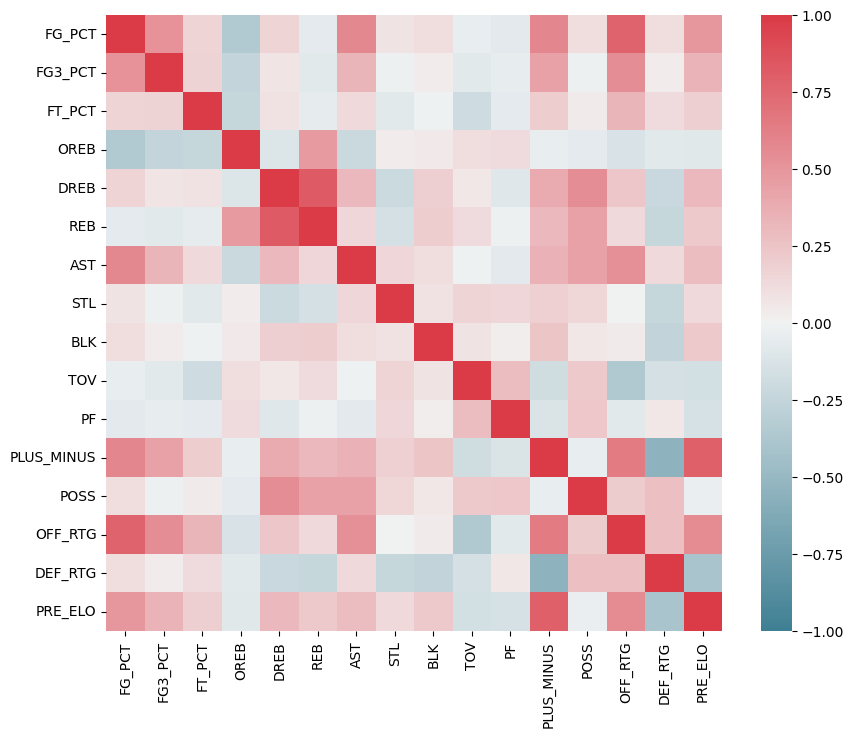

In [ ]:
# Correlation plot of all predictor variables

f, ax = plt.subplots(figsize=(10, 8))
corr = df_predictors.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

<Axes: xlabel='WL', ylabel='FG3_PCT'>

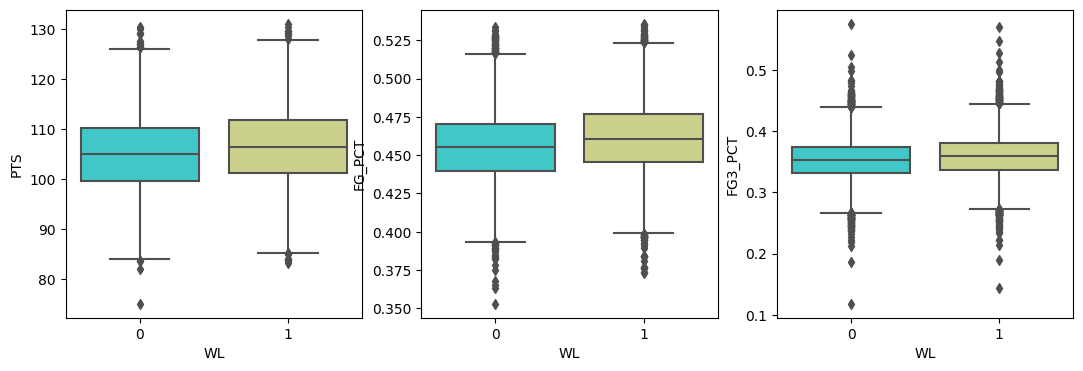

In [ ]:
#Boxplots
fig, axs = plt.subplots(ncols=3, figsize=(13, 4))
sns.boxplot(x="WL", y="PTS", data = df_final2, palette = "rainbow", ax = axs[0])
sns.boxplot(x="WL", y="FG_PCT", data = df_final2, palette = "rainbow", ax = axs[1])
sns.boxplot(x="WL", y="FG3_PCT", data = df_final2, palette = "rainbow", ax = axs[2])

<Axes: xlabel='WL', ylabel='REB'>

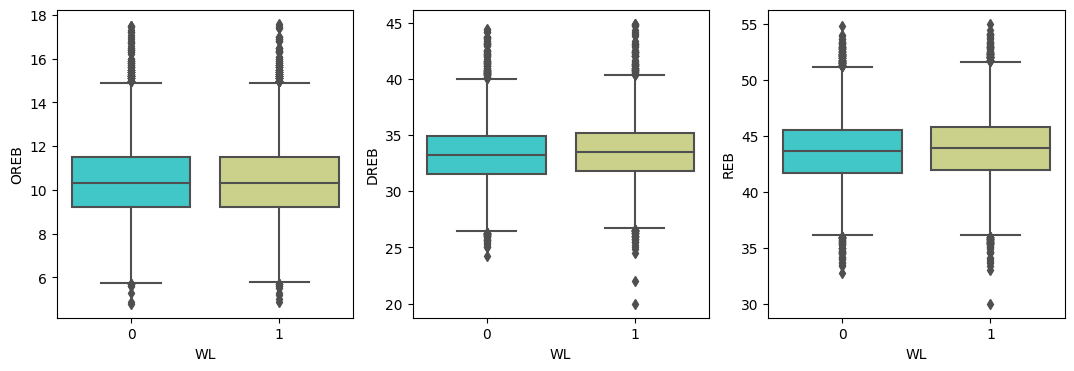

In [ ]:
#Boxplots
fig, axs = plt.subplots(ncols=3, figsize=(13, 4))
sns.boxplot(x="WL", y="OREB", data = df_final2, palette = "rainbow", ax = axs[0])
sns.boxplot(x="WL", y="DREB", data = df_final2, palette = "rainbow", ax = axs[1])
sns.boxplot(x="WL", y="REB", data = df_final2, palette = "rainbow", ax = axs[2])

<Axes: xlabel='WL', ylabel='BLK'>

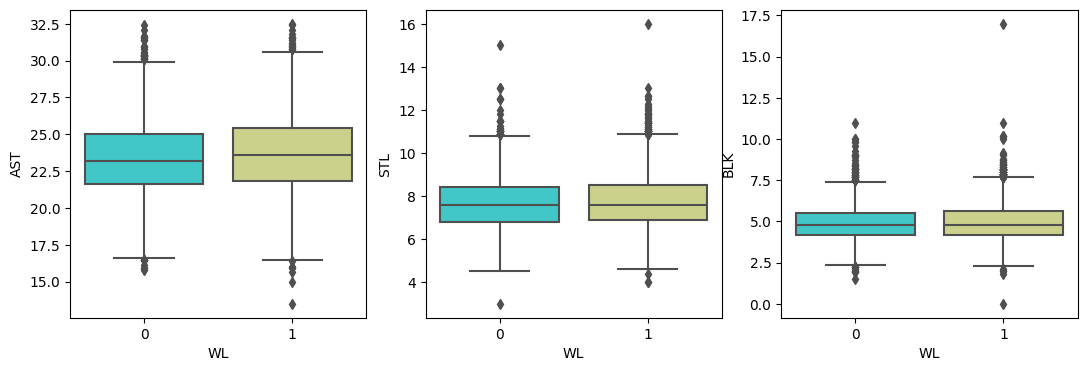

In [ ]:
#Boxplots
fig, axs = plt.subplots(ncols=3, figsize=(13, 4))
sns.boxplot(x="WL", y="AST", data = df_final2, palette = "rainbow", ax = axs[0])
sns.boxplot(x="WL", y="STL", data = df_final2, palette = "rainbow", ax = axs[1])
sns.boxplot(x="WL", y="BLK", data = df_final2, palette = "rainbow", ax = axs[2])

<Axes: xlabel='WL', ylabel='PLUS_MINUS'>

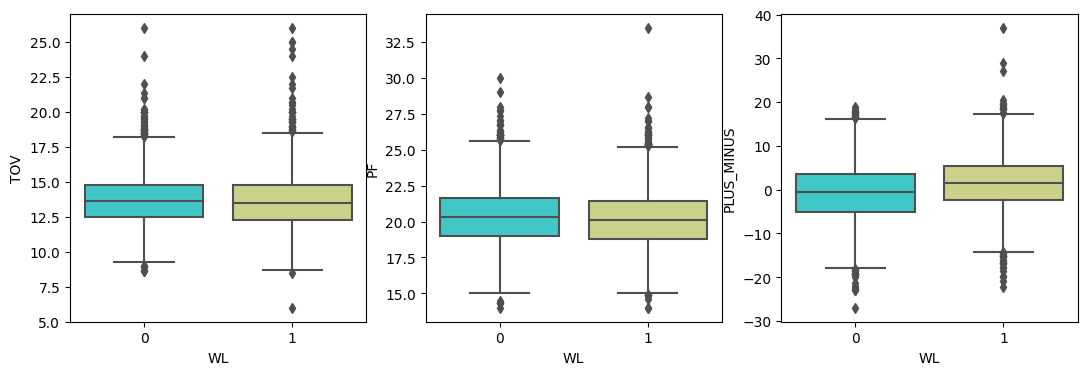

In [ ]:
#Boxplots
fig, axs = plt.subplots(ncols=3, figsize=(13, 4))
sns.boxplot(x="WL", y="TOV", data = df_final2, palette = "rainbow", ax = axs[0])
sns.boxplot(x="WL", y="PF", data = df_final2, palette = "rainbow", ax = axs[1])
sns.boxplot(x="WL", y="PLUS_MINUS", data = df_final2, palette = "rainbow", ax = axs[2])



Logistic Regression (L2)

In [ ]:
#fit model
logit_ridge = LogisticRegression(penalty = 'l2')
logit_ridge.fit(x_train, y_train)
pred_ridge = logit_ridge.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#get score and coefficients
print("Training accuracy: ", logit_ridge.score(x_train, y_train))
print("Testing accuracy: ", logit_ridge.score(x_test, y_test))
coefficients = pd.concat([pd.DataFrame(x_train.columns), pd.DataFrame(np.transpose(logit_ridge.coef_))], axis = 1)
coefficients

Training accuracy:  0.5979743791333303
Testing accuracy:  0.5951612903225807


,0,0
0,FG_PCT,-0.000780
1,FG3_PCT,-0.001118
2,FT_PCT,-0.002121
3,OREB,-0.010892
4,DREB,-0.003761
5,REB,-0.014652
6,AST,0.028502
7,STL,-0.013935
8,BLK,0.003089
9,TOV,-0.016515


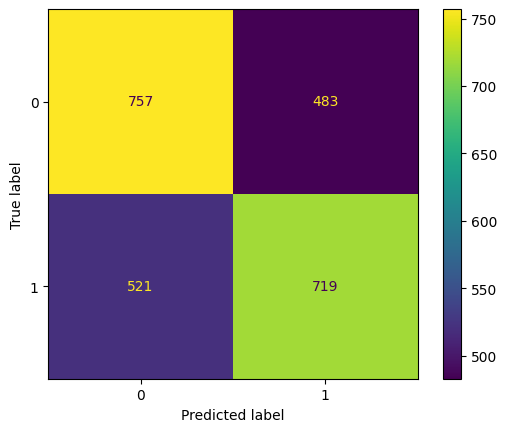

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred_ridge, labels=logit_ridge.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logit_ridge.classes_)
disp.plot()
plt.show()

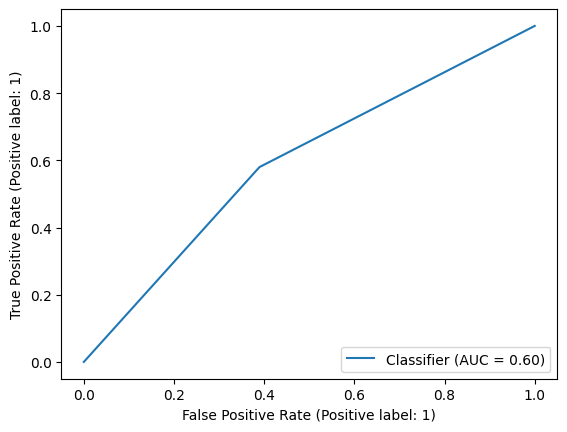

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, pred_ridge)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_ridge))

              precision    recall  f1-score   support

           0       0.59      0.61      0.60      1240
           1       0.60      0.58      0.59      1240

    accuracy                           0.60      2480
   macro avg       0.60      0.60      0.60      2480
weighted avg       0.60      0.60      0.60      2480



Logistic Regression (L1)

In [ ]:
#fit model
logit_lasso = LogisticRegression(penalty = 'l1')
logit_lasso.fit(x_train, y_train)
pred_lasso = logit_lasso.predict(x_test)

ValueError: ignored

In [ ]:
#get score and coefficients
print("Training accuracy: ", logit_lasso.score(x_train, y_train))
print("Testing accuracy: ", logit_lasso.score(x_test, y_test))
coefficients = pd.concat([pd.DataFrame(x_train.columns), pd.DataFrame(np.transpose(logit_lasso.coef_))], axis = 1)
coefficients

In [ ]:
cm = confusion_matrix(y_test, pred_lasso, labels=logit_lasso.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logit_lasso.classes_)
disp.plot()
plt.show()

In [ ]:
RocCurveDisplay.from_predictions(y_test, pred_lasso)

NameError: ignored

In [ ]:
print(classification_report(y_test, pred_lasso))

Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
predGNBtrain = gnb.predict(x_train)
predGNB = gnb.predict(x_test)
print("training accuracy: ", accuracy_score(predGNBtrain, y_train))
print("Testing accuracy: ", accuracy_score(predGNB, y_test))

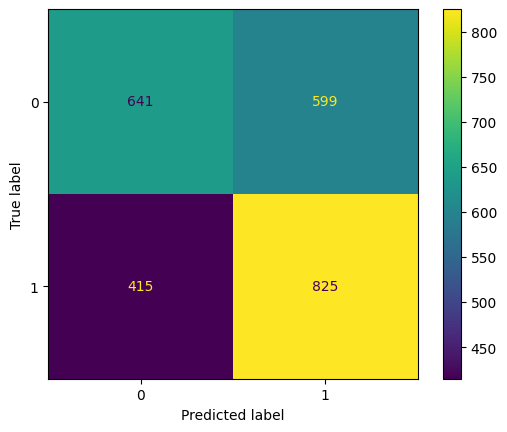

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predGNB, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()
plt.show()

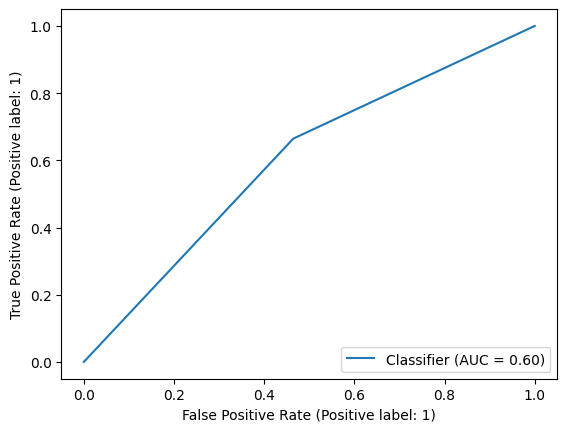

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, predGNB)

In [ ]:
print(classification_report(y_test, predGNB))

              precision    recall  f1-score   support

           0       0.61      0.54      0.57      1240
           1       0.59      0.66      0.62      1240

    accuracy                           0.60      2480
   macro avg       0.60      0.60      0.60      2480
weighted avg       0.60      0.60      0.60      2480



SVM

In [ ]:
svm = SVC(kernel = 'poly')
mod = svm.fit(x_train, y_train)
pred_svmtrain = mod.predict(x_train)
pred_svm = mod.predict(x_test)
print("Training accuracy: ", accuracy_score(pred_svmtrain, y_train))
print("Testing accuracy: ", accuracy_score(pred_svm, y_test))

In [ ]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.61      0.59      0.60      1240
           1       0.61      0.63      0.62      1240

    accuracy                           0.61      2480
   macro avg       0.61      0.61      0.61      2480
weighted avg       0.61      0.61      0.61      2480



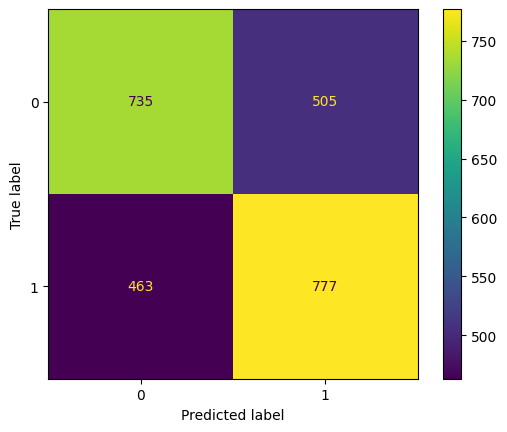

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred_svm, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()
plt.show()

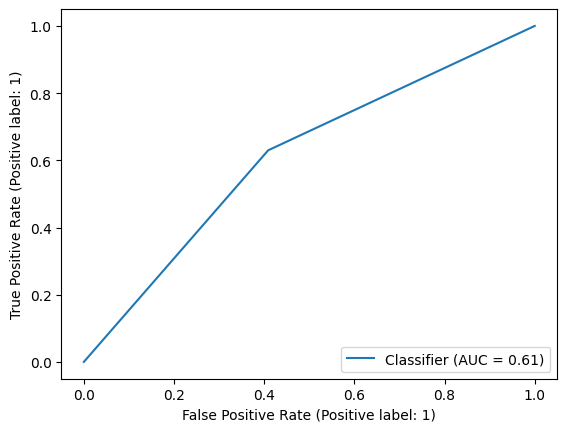

In [ ]:
RocCurveDisplay.from_predictions(y_test, pred_svm)

In [ ]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.61      0.59      0.60      1240
           1       0.61      0.63      0.62      1240

    accuracy                           0.61      2480
   macro avg       0.61      0.61      0.61      2480
weighted avg       0.61      0.61      0.61      2480



Random Forest

In [ ]:
rfr = RandomForestClassifier(random_state=0)
rfr.fit(x_train, y_train)
rfr_pred = rfr.predict(x_test)
print("Testing accuracy: ", accuracy_score(rfr_pred, y_test))

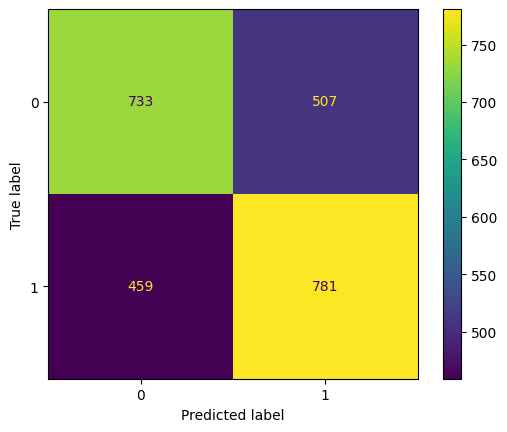

In [ ]:
cm = confusion_matrix(y_test, rfr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

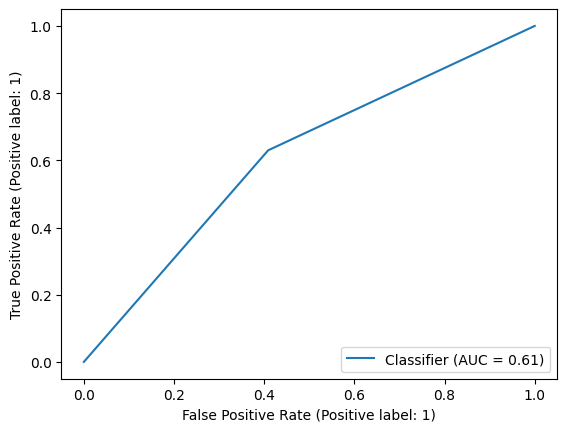

In [ ]:
RocCurveDisplay.from_predictions(y_test, rfr_pred)

In [ ]:
print(classification_report(y_test, rfr_pred))

              precision    recall  f1-score   support

           0       0.61      0.59      0.60      1240
           1       0.61      0.63      0.62      1240

    accuracy                           0.61      2480
   macro avg       0.61      0.61      0.61      2480
weighted avg       0.61      0.61      0.61      2480



In [ ]:
#Tune hyper parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [5, 50, 100],
              'min_samples_leaf': [2, 4,6],
              'max_depth': [None, 5, 10],
              'max_features': ['sqrt']}

#fit grib
grid_rfr = GridSearchCV(rfr, param_grid, cv=5, n_jobs=-1)

#use grid search
grid_rfr.fit(x_train, y_train)

print('Best overall accuracy: ', grid_rfr.best_score_)
print('Parameters for result: ', grid_rfr.best_params_)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'n_estimators': [5, 10, 20, 30, 40, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 350, 400, 450, 500],
              'min_samples_leaf': [2, 4, 6, 8, 10, 12],
              'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
              'max_features': ['auto', 'sqrt']}

#fit grid
r_rfr = RandomizedSearchCV(rfr, param_dist, cv=3, n_iter = 100)

#use grid search
r_rfr.fit(x_train, np.ravel(y_train))

In [ ]:
print('Best overall accuracy: ', r_rfr.best_score_)
print('Parameters for result: ', r_rfr.best_params_)

Neural Network

In [ ]:
# import needed libraries
from __future__ import absolute_import, division, print_function, unicode_literals

# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import optimizers
# Helper libraries

print(tf.__version__)

2.12.0


In [ ]:
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(21623, 16) (21623, 1)
(2480, 16) (2480, 1)


In [ ]:
# normalize data
from sklearn import preprocessing

scaler = StandardScaler()

norm_x_train = pd.DataFrame(
    scaler.fit_transform(x_train),
    columns = x_train.columns
)

norm_x_test = pd.DataFrame(
    scaler.fit_transform(x_test),
    columns = x_test.columns
)

norm_x_train
norm_x_test


,FG_PCT,FG3_PCT,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,POSS,OFF_RTG,DEF_RTG,PRE_ELO
0,0.599157,0.819321,0.910201,0.280342,1.334955,1.287040,-0.967145,-0.435678,-1.462448,0.690360,-1.582262,1.014897,-0.789699,1.006470,-0.260466,1.064995
1,0.607976,0.604410,0.857913,0.517204,1.936486,1.938518,-1.136526,-0.611738,-1.462448,0.479641,-1.463358,1.635424,-0.682249,1.085407,-1.078536,1.084347
2,0.330159,0.484624,0.945852,0.754066,1.843943,2.015162,-1.305907,0.356593,-1.462448,0.268922,-1.344454,1.709296,-0.413624,1.017327,-1.242529,1.161756
3,0.409535,0.491670,1.114600,0.398773,1.705128,1.670262,-1.390597,-0.083558,-1.360960,0.128442,-0.690482,1.724071,-0.175699,1.107674,-1.152220,1.219812
4,0.078800,0.171066,1.318999,0.576420,1.797671,1.861873,-1.390597,0.180533,-1.157984,0.268922,-0.512126,1.709296,-0.083599,0.978969,-1.254500,1.316572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,0.969580,1.552130,0.931592,-0.430243,-0.145737,-0.399138,0.599629,1.060833,-0.549057,-1.416831,-0.036510,0.793280,0.108276,1.750889,0.773500,0.474758
2476,0.846105,1.361881,1.007647,-0.430243,-0.192009,-0.437461,0.514939,0.972803,-1.056496,-1.627550,-0.452674,0.793280,0.000826,1.776098,0.791830,0.523138
2477,0.872564,1.087078,1.067066,-0.074951,-0.330823,-0.322494,0.303212,1.148863,-1.462448,-1.768029,-0.393222,0.808055,-0.329199,1.896679,0.907587,0.494110
2478,0.973990,1.566223,1.012401,0.102696,-0.145737,-0.054238,0.430248,0.884773,-1.563935,-1.908509,-0.333770,0.955799,-0.336874,2.158819,0.975518,0.561842


In [ ]:
# split into validation and training sets

norm_x_train, norm_x_val, y_train, y_val= train_test_split(norm_x_train, y_train, test_size=0.2)

In [ ]:
print ("xtrain.shape is ",norm_x_train.shape)
print ("xval.shape is ",norm_x_val.shape)
print ("xtest.shape is ",norm_x_test.shape)

print ("ytrain.shape is ", y_train.shape)
print ("yval.shape is ", y_val.shape)
print ("ytest.shape is ", y_test.shape)

xtrain.shape is  (17298, 16)
xval.shape is  (4325, 16)
xtest.shape is  (2480, 16)
ytrain.shape is  (17298, 1)
yval.shape is  (4325, 1)
ytest.shape is  (2480, 1)


In [ ]:
from tensorflow.python import train
def mapto1hot():

  y_train_1hot = tf.keras.utils.to_categorical(y_train, num_classes=2)
  y_val_1hot = tf.keras.utils.to_categorical(y_val, num_classes=2)
  y_test_1hot = tf.keras.utils.to_categorical(y_test, num_classes=2)

  return y_train_1hot, y_val_1hot, y_test_1hot

In [ ]:
y_train_1hot, y_val_1hot, y_test_1hot = mapto1hot()

print (norm_x_train.shape, y_train_1hot.shape)
print (norm_x_val.shape, y_val_1hot.shape)
print (norm_x_test.shape, y_test_1hot.shape)

(17298, 16) (17298, 2)
(4325, 16) (4325, 2)
(2480, 16) (2480, 2)


In [ ]:
# original MLP model

layers = [
    tf.keras.layers.Flatten(),
    #Add your first layer details here, Example Dense(50, activation="tanh"),
    tf.keras.layers.Dense(100, activation = "relu"),
    #Add your second layer details here
    tf.keras.layers.Dense(2, activation = "softmax")
    ]

opt = tf.keras.optimizers.experimental.SGD(learning_rate=0.01)
model = Sequential(layers)

#refer to https://www.tensorflow.org/tutorials/keras/classification tutorial to check on how to use compile function
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])

# This will start the training and save each epoch output in the history list.
history = model.fit(norm_x_train, y_train_1hot, batch_size=16, epochs=20 , validation_data=(norm_x_val, y_val_1hot))

Epoch 1/20
1082/1082 [==============================] - 2s 2ms/step - loss: 0.6752 - accuracy: 0.5868 - val_loss: 0.6667 - val_accuracy: 0.5914
Epoch 2/20
1082/1082 [==============================] - 2s 1ms/step - loss: 0.6630 - accuracy: 0.6060 - val_loss: 0.6651 - val_accuracy: 0.6025
Epoch 3/20
1082/1082 [==============================] - 2s 2ms/step - loss: 0.6605 - accuracy: 0.6057 - val_loss: 0.6648 - val_accuracy: 0.5958
Epoch 4/20
1082/1082 [==============================] - 2s 2ms/step - loss: 0.6595 - accuracy: 0.6065 - val_loss: 0.6657 - val_accuracy: 0.5984
Epoch 5/20
1082/1082 [==============================] - 2s 1ms/step - loss: 0.6589 - accuracy: 0.6093 - val_loss: 0.6650 - val_accuracy: 0.6000
Epoch 6/20
1082/1082 [==============================] - 2s 1ms/step - loss: 0.6585 - accuracy: 0.6085 - val_loss: 0.6677 - val_accuracy: 0.5958
Epoch 7/20
1082/1082 [==============================] - 2s 1ms/step - loss: 0.6577 - accuracy: 0.6091 - val_loss: 0.6661 - val_accuracy:

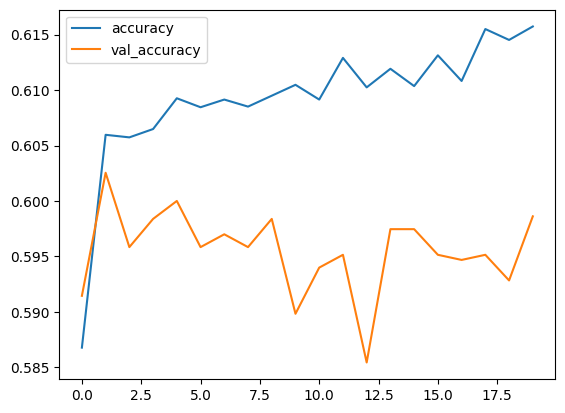

In [ ]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.legend()
plt.show()

In [ ]:
# MLP: 4 hidden layers, 20 epochs, batch_size = 32

layers = [
    tf.keras.layers.Flatten(),
    #Add your first layer details here, Example Dense(50, activation="tanh"),
    tf.keras.layers.Dense(100, activation = "relu"),
    #Add your first layer details here, Example Dense(50, activation="tanh"),
    tf.keras.layers.Dense(100, activation = "relu"),
    #Add your first layer details here, Example Dense(50, activation="tanh"),
    tf.keras.layers.Dense(100, activation = "relu"),
    #Add your first layer details here, Example Dense(50, activation="tanh"),
    tf.keras.layers.Dense(100, activation = "relu"),
    #Add your second layer details here
    tf.keras.layers.Dense(2, activation = "softmax")
    ]

opt = tf.keras.optimizers.experimental.SGD(learning_rate=0.01)
model = Sequential(layers)

#refer to https://www.tensorflow.org/tutorials/keras/classification tutorial to check on how to use compile function
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])

# This will start the training and save each epoch output in the history list.
history = model.fit(norm_x_train, y_train_1hot, batch_size=32, epochs=20 , validation_data=(norm_x_val, y_val_1hot))

Epoch 1/20
541/541 [==============================] - 2s 2ms/step - loss: 0.6735 - accuracy: 0.5856 - val_loss: 0.6670 - val_accuracy: 0.5850
Epoch 2/20
541/541 [==============================] - 1s 2ms/step - loss: 0.6643 - accuracy: 0.5994 - val_loss: 0.6649 - val_accuracy: 0.5945
Epoch 3/20
541/541 [==============================] - 1s 2ms/step - loss: 0.6619 - accuracy: 0.6035 - val_loss: 0.6641 - val_accuracy: 0.5931
Epoch 4/20
541/541 [==============================] - 1s 2ms/step - loss: 0.6602 - accuracy: 0.6055 - val_loss: 0.6639 - val_accuracy: 0.5933
Epoch 5/20
541/541 [==============================] - 1s 2ms/step - loss: 0.6587 - accuracy: 0.6065 - val_loss: 0.6645 - val_accuracy: 0.6002
Epoch 6/20
541/541 [==============================] - 1s 2ms/step - loss: 0.6579 - accuracy: 0.6102 - val_loss: 0.6637 - val_accuracy: 0.5949
Epoch 7/20
541/541 [==============================] - 1s 2ms/step - loss: 0.6570 - accuracy: 0.6093 - val_loss: 0.6644 - val_accuracy: 0.5970
Epoch 

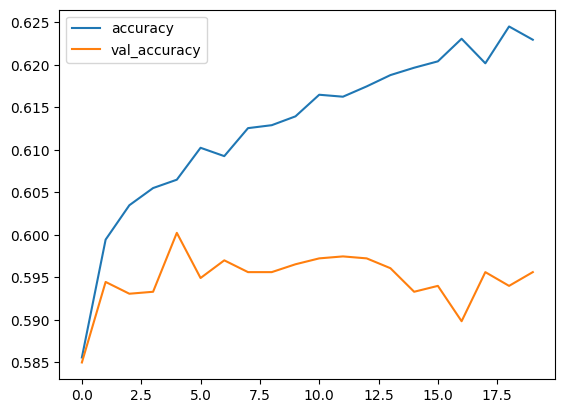

In [ ]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.legend()
plt.show()

In [ ]:
# Overfitting seems to be an issue as epochs increase, use early stopping to help with this

from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

In [ ]:
y_train_1hot

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
# MLP: 8 hidden layers, 20 epochs, batch_size = 32

layers = [
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(2, activation = "softmax")
    ]

opt = tf.keras.optimizers.experimental.SGD(learning_rate=0.01)
model = Sequential(layers)

#refer to https://www.tensorflow.org/tutorials/keras/classification tutorial to check on how to use compile function
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])

# This will start the training and save each epoch output in the history list.
history = model.fit(norm_x_train, y_train_1hot, batch_size=32, epochs=20 , validation_data=(norm_x_val, y_val_1hot), callbacks=[earlystopping])

Epoch 1/20
541/541 [==============================] - 3s 2ms/step - loss: 0.6919 - accuracy: 0.5254 - val_loss: 0.6893 - val_accuracy: 0.5440
Epoch 2/20
541/541 [==============================] - 1s 2ms/step - loss: 0.6872 - accuracy: 0.5527 - val_loss: 0.6831 - val_accuracy: 0.5667
Epoch 3/20
541/541 [==============================] - 1s 2ms/step - loss: 0.6810 - accuracy: 0.5702 - val_loss: 0.6769 - val_accuracy: 0.5790
Epoch 4/20
541/541 [==============================] - 1s 2ms/step - loss: 0.6763 - accuracy: 0.5786 - val_loss: 0.6730 - val_accuracy: 0.5840
Epoch 5/20
541/541 [==============================] - 1s 2ms/step - loss: 0.6731 - accuracy: 0.5837 - val_loss: 0.6704 - val_accuracy: 0.5864
Epoch 6/20
541/541 [==============================] - 1s 2ms/step - loss: 0.6710 - accuracy: 0.5883 - val_loss: 0.6691 - val_accuracy: 0.5854
Epoch 7/20
541/541 [==============================] - 1s 2ms/step - loss: 0.6697 - accuracy: 0.5911 - val_loss: 0.6681 - val_accuracy: 0.5877
Epoch 

In [ ]:
# MLP: 12 hidden layers, 30 epochs, batch_size = 64

layers = [
    # tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(2, activation = "softmax")
    ]

opt = tf.keras.optimizers.experimental.SGD(learning_rate=0.01)
model = Sequential(layers)

#refer to https://www.tensorflow.org/tutorials/keras/classification tutorial to check on how to use compile function
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])

# This will start the training and save each epoch output in the history list.
history = model.fit(norm_x_train, y_train_1hot, batch_size=64, epochs=30 , validation_data=(norm_x_val, y_val_1hot), callbacks=[earlystopping])

Epoch 1/30


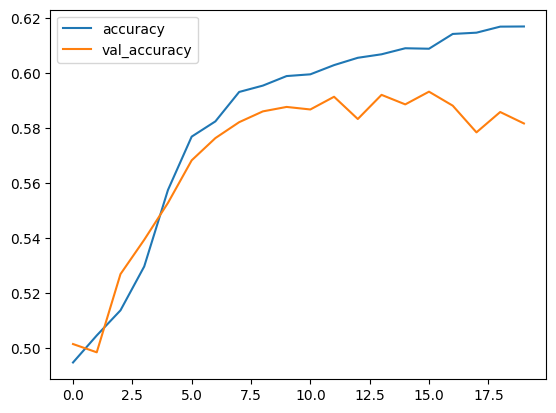

In [ ]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(norm_x_test,  y_test_1hot, verbose=2)

print('\nTest accuracy:', test_acc)

78/78 - 0s - loss: 0.6690 - accuracy: 0.6016 - 112ms/epoch - 1ms/step

Test accuracy: 0.60161292552948


In [ ]:
# MLP: 10 hidden layers, 20 epochs, batch_size = 64

layers = [
    # tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(14, activation = "relu"),
    tf.keras.layers.Dense(14, activation = "relu"),
    tf.keras.layers.Dense(14, activation = "relu"),
    tf.keras.layers.Dense(14, activation = "relu"),
    tf.keras.layers.Dense(14, activation = "relu"),
    tf.keras.layers.Dense(14, activation = "relu"),
    tf.keras.layers.Dense(14, activation = "relu"),
    tf.keras.layers.Dense(14, activation = "relu"),
    tf.keras.layers.Dense(14, activation = "relu"),
    tf.keras.layers.Dense(14, activation = "relu"),
    tf.keras.layers.Dense(2, activation = "softmax")
    ]

opt = tf.keras.optimizers.experimental.SGD(learning_rate=0.01)
model = Sequential(layers)

#refer to https://www.tensorflow.org/tutorials/keras/classification tutorial to check on how to use compile function
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])

# This will start the training and save each epoch output in the history list.
history = model.fit(norm_x_train, y_train_1hot, batch_size=64, epochs=20, validation_data=(norm_x_val, y_val_1hot), callbacks=[earlystopping])

Epoch 1/20
271/271 [==============================] - 4s 9ms/step - loss: 0.6931 - accuracy: 0.5009 - val_loss: 0.6928 - val_accuracy: 0.5410
Epoch 2/20
271/271 [==============================] - 1s 3ms/step - loss: 0.6927 - accuracy: 0.5285 - val_loss: 0.6924 - val_accuracy: 0.5471
Epoch 3/20
271/271 [==============================] - 1s 3ms/step - loss: 0.6923 - accuracy: 0.5312 - val_loss: 0.6920 - val_accuracy: 0.5540
Epoch 4/20
271/271 [==============================] - 1s 3ms/step - loss: 0.6919 - accuracy: 0.5499 - val_loss: 0.6916 - val_accuracy: 0.5582
Epoch 5/20
271/271 [==============================] - 1s 3ms/step - loss: 0.6913 - accuracy: 0.5543 - val_loss: 0.6908 - val_accuracy: 0.5716
Epoch 6/20
271/271 [==============================] - 1s 2ms/step - loss: 0.6905 - accuracy: 0.5647 - val_loss: 0.6898 - val_accuracy: 0.5792
Epoch 7/20
271/271 [==============================] - 1s 3ms/step - loss: 0.6894 - accuracy: 0.5714 - val_loss: 0.6886 - val_accuracy: 0.5709
Epoch 

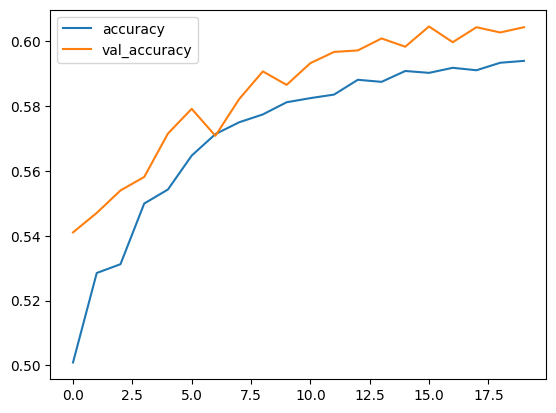

In [ ]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(norm_x_test,  y_test_1hot, verbose=2)

print('\nTest accuracy:', test_acc)

78/78 - 0s - loss: 0.6746 - accuracy: 0.5879 - 116ms/epoch - 1ms/step

Test accuracy: 0.5879032015800476


In [ ]:
history.history["accuracy"]

[0.5267083048820496,
 0.5432997941970825,
 0.5580413937568665,
 0.5671753883361816,
 0.5770609378814697,
 0.579835832118988,
 0.5831310153007507,
 0.5875823497772217,
 0.5893744826316833,
 0.5918025374412537,
 0.5938258767127991,
 0.5934790372848511,
 0.5948664546012878,
 0.5968897938728333,
 0.5968319773674011,
 0.5996068716049194,
 0.5981616377830505,
 0.5994912981987,
 0.598739743232727,
 0.5992600321769714]